# 📂 Overview

* **Background** <br>
Every bank wants to hold there customers for sustaining their business. Understanding the reasons why customers leave will help banks improve retention policies and reduce costs.

* **Goal of the Project** <br>
Based on the data, we will find out what causes customers to leave and then come up with appropriate strategies to help the bank.

**Key Features**

**Target Variable** <br>
- `churn`: *whether or not the customer left the bank.*

**General Property Characteristics** <br>
- `CustomerId`: Contains random values and has no effect on customer leaving the bank.
- `credit_score`: can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
- `country`: A customer’s location can affect their decision to leave the bank.
- `gender`: It’s interesting to explore whether gender plays a role in a customer leaving the bank.
- `age`: This is certainly relevant, since older customers are less likely to leave their bank than younger ones.
- `tenure`: Refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
- `balance`: Also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
- `products_number`: Refers to the number of products that a customer has purchased through the bank.
- `credit_card`: Denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
- `active_member`: Active customers are less likely to leave the bank.
- `estimated_salary`: As with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.

**Files Provided**

* [Bank Customer Churn Prediction.csv](https://drive.google.com/file/d/1jRqZfPMoM3zKsuT2G5EsR777LKDjYj_f/view)

**Project Objective**

The primary objective of this notebook is to **EDA and build machine learning model to predict**.

Key components of the approach include:

* **Exploratory Data Analysis (EDA):** Understand feature distributions, relationships.
* **Feature Engineering:** Encode categorical variables and align schema across training and test data.
* **Modeling:** Train with some models and choise the best model for predicting.
* **Multi-Label Prediction Strategy:** Generate predictions for each test row.
* **Evaluation Framework:** <br>
  * Cross-validation.
  * Metrics: ROC-AUC

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Import Libraries</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #2e7d32; 
    padding: 20px; 
    background: linear-gradient(125deg, #1b5e20 5%, #43a047 40%, #81c784 75%, #c8e6c9 100%);
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #fff; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 10px; 
        font-size: 36px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Import Libraries
    </h1>
</div>


In [326]:
# Core data manipulation libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import shap

# Statistical functions
from scipy.stats import skew

# Display utilities for Jupyter notebooks
from IPython.display import display

# Machine learning preprocessing and modeling
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder, RobustScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Metrics
from sklearn.metrics import (roc_curve, roc_auc_score, classification_report, confusion_matrix,
                             precision_recall_curve, auc, average_precision_score)

# Statistical
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu
from scipy.stats import normaltest

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 500) # To display all the columns of dataframe
pd.set_option("max_colwidth", None) # To set the width of the column to maximum

In [284]:
class config:
    test_size=0.2
    random_state=42
    cv=5
    max_iter=50000
    link = "https://drive.google.com/file/d/1jRqZfPMoM3zKsuT2G5EsR777LKDjYj_f/view"
    test_size=0.2
    n_split=1

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Load Data</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #2e7d32; 
    padding: 20px; 
    background: linear-gradient(125deg, #1b5e20 5%, #43a047 40%, #81c784 75%, #c8e6c9 100%);
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #fff; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 10px; 
        font-size: 36px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Load Data
    </h1>
</div>

In [ ]:
path = "https://drive.google.com/uc?id=" + config.link.split("/")[-2]
df_customer_churn = pd.read_csv(path)

# Verify shapes
print("Data Shape:", df_customer_churn.shape)

Data Shape: (10000, 12)


<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Preview and Info</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #2e7d32; 
    padding: 20px; 
    background: linear-gradient(125deg, #1b5e20 5%, #43a047 40%, #81c784 75%, #c8e6c9 100%);
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #fff; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 10px; 
        font-size: 36px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Data Preview and Info
    </h1>
</div>

In [234]:
# Display few rows of dataset
print("Data Preview:")
display(df_customer_churn.head())

Data Preview:


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [235]:
# Display information about the DataFrames
print("Data Info:")
df_customer_churn.info()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


## Insights from Initial Data Exploration

**Dataset Size and Structure**  
   - The **dataset** contains **10000** samples with **12** columns, including the target variable `churn`.

**Feature Overview**  
   - Both datasets include all important attributes:
     - **Numerical features:** `credit_score`, `age`, `tenure`, `balance`, `estimated_salary`.
     - **Categorical features:** `country`, `gender`, `credit_card`, `active_member`, `products_number`.
   - The target variable is **int64** value but we need to convert to **int8** to save memory usage.

**Data Completeness**  
   - Data types are appropriate: numerical features is float64 and int64, and categorical features are objects (strings).
   - The columns `customer_id` is not meaningful for analysis. So this column is not really a part of the information we should care about. We can drop them.

In [236]:
# Drop column customer_id
df_customer_churn.drop(columns="customer_id", axis=1, inplace=True)
# Remove space in columns
df_customer_churn.columns = (df_customer_churn.columns.str.strip().str.replace(" ", ""))

In [237]:
num_features = ["credit_score", "age", "tenure", "balance", "estimated_salary"]
cm = sns.light_palette("green", as_cmap=True)
display(df_customer_churn[num_features].describe().T.style.background_gradient(cmap=cm))

,count,mean,std,min,25%,50%,75%,max
credit_score,10000.000000,650.528800,96.653299,350.000000,584.000000,652.000000,718.000000,850.000000
age,10000.000000,38.921800,10.487806,18.000000,32.000000,37.000000,44.000000,92.000000
tenure,10000.000000,5.012800,2.892174,0.000000,3.000000,5.000000,7.000000,10.000000
balance,10000.000000,76485.889288,62397.405202,0.000000,0.000000,97198.540000,127644.240000,250898.090000
estimated_salary,10000.000000,100090.239881,57510.492818,11.580000,51002.110000,100193.915000,149388.247500,199992.480000


## Descriptive Statistics

* **Credit Score**: Avg ~651, range 350–850, mostly between 584–718.
* **Age**: Avg ~39 years, concentrated in 32–44.
* **Tenure**: Avg ~5 years, spread across 0–10 years.
* **Balance**: Avg ~76,486; 25% of customers **have zero balance**, max ~250,898.
* **Estimated Salary**: Avg ~100,090; evenly distributed, max ~199,992.

**Key Highlight**: **Balance shows the highest variation** → many customers with zero balance but also a group with very high balances.

In [238]:
def cast_features(dfs, dtype_map):
    """
    Cast multiple features in multiple DataFrames to specific dtypes.

    Args:
        dfs (list): List of DataFrames to process.
        dtype_map (dict): {column_name: target_dtype} mapping.
    """
    for df in dfs:
        for col, dtype in dtype_map.items():
            if col in df.columns:
                df[col] = df[col].astype(dtype)

# Mapping of columns and their target data types
dtype_map = {
    "credit_score": "int16",
    "age": "int8",
    "tenure": "int8",
    "balance": "float32",
    "churn": "int8",
    "estimated_salary": "float32"
}

# Apply the function to both df_train and df_test
cast_features([df_customer_churn], dtype_map)

cat_features = ["country", "gender", "credit_card", "active_member", "products_number"]
def convert_cat(df, cat_features= cat_features):
    for feature in cat_features:
        if feature in df.columns:
            df[feature] = df[feature].astype("category")
        else:
            pass

convert_cat(df=df_customer_churn)
# Display information about the DataFrames
print("Data Info:")
df_customer_churn.info()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   credit_score      10000 non-null  int16   
 1   country           10000 non-null  category
 2   gender            10000 non-null  category
 3   age               10000 non-null  int8    
 4   tenure            10000 non-null  int8    
 5   balance           10000 non-null  float32 
 6   products_number   10000 non-null  category
 7   credit_card       10000 non-null  category
 8   active_member     10000 non-null  category
 9   estimated_salary  10000 non-null  float32 
 10  churn             10000 non-null  int8    
dtypes: category(5), float32(2), int16(1), int8(3)
memory usage: 176.6 KB


In [239]:
print("Data describe:")
display(df_customer_churn[cat_features].describe().T.style.background_gradient(cmap="Greens", subset=["unique", "freq"]))

Data describe:


,count,unique,top,freq
country,10000,3,France,5014
gender,10000,2,Male,5457
credit_card,10000,2,1,7055
active_member,10000,2,1,5151
products_number,10000,4,1,5084


## Descriptive Statistics – Categorical Features

* **Country**: 3 categories, majority from **France (50%)**.
* **Gender**: Balanced, slightly more **Male (55%)**.
* **Credit Card**: 71% of customers own at least **1 credit card**.
* **Active Member**: ~52% are **active members**.
* **Products Number**: Customers typically own **1 product** (~51%).

**Key Highlight**: The dataset is **dominated by French customers**, with most holding a credit card and one product.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Quality Checks</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #2e7d32; 
    padding: 20px; 
    background: linear-gradient(125deg, #1b5e20 5%, #43a047 40%, #81c784 75%, #c8e6c9 100%);
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #fff; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 10px; 
        font-size: 36px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Data Quality Checks
    </h1>
</div>


## Handling Missing Value

In [240]:
def displayNULL(df, dataset_name=None):
    total_rows = len(df)

    missing_df = df.isnull().sum().reset_index()
    missing_df.columns = ["Feature", "Missing_Count"]
    missing_df = missing_df[missing_df["Missing_Count"] > 0]
    missing_df["Missing_%"] = (missing_df["Missing_Count"] / total_rows * 100).round(2)
    missing_df = missing_df.sort_values(by="Missing_Count", ascending=False).reset_index(drop=True)

    total_missing = missing_df["Missing_Count"].sum()

    print("=" * 40)
    if dataset_name:
        print(f"🔎 Missing Value Summary for: {dataset_name}")
    else:
        print("🔎 Missing Value Summary:")
    print("=" * 40)
    
    if total_missing == 0:
        print(f"✅ No missing values detected in {total_rows:,} rows.")
    else:
        try:
            from tabulate import tabulate
            print(tabulate(missing_df, headers="keys", tablefmt="pretty", showindex=False, colalign=("left", "left", "left")))
        except ImportError:
            print(missing_df.to_string(index=False))
        
        print(f"\n⚠️  Total missing values: {total_missing:,} out of {total_rows:,} rows.")
print("Missing value train dataset: ")
displayNULL(df_customer_churn, dataset_name="Dataset")

Missing value train dataset: 
🔎 Missing Value Summary for: Dataset
✅ No missing values detected in 10,000 rows.


## Checking duplicate Value

In [241]:
def check_duplicates_report(df, dataset_name):
    duplicates_count = df.duplicated().sum()
    total_rows = len(df)
    
    print("=" * 40)
    print(f"🔍 {dataset_name} Duplicate Analysis")
    print("=" * 40)
    
    if duplicates_count == 0:
        print(f"✅ No duplicates found in {total_rows:,} rows")
    else:
        print(f"⚠️  {duplicates_count} duplicates found ({duplicates_count/total_rows:.2%})")
        print(f"    Total rows affected: {duplicates_count:,}/{total_rows:,}")

datasets = {
    "Data": df_customer_churn
}

duplicate_summary = {}
for name, data in datasets.items():
    check_duplicates_report(data, name)
    duplicate_summary[name] = {
        "duplicates": data.duplicated().sum(),
        "total_rows": len(data)
    }

🔍 Data Duplicate Analysis
✅ No duplicates found in 10,000 rows


## Checking Outlier Value

In [242]:
def checking_outlier(list_feature, df, dataset_name):
    print("=" * 40)
    print(f"🔍 {dataset_name} Checking outlier")
    print("=" * 40)
    outlier_info = []
    for feature in list_feature:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]
        if len(outliers) == 0:
            pass
        else:
            outlier_info.append({
            "Feature": feature,
            "Outlier Count": len(outliers),
            # "Outlier Detail": outliers.tolist()
            })
    return pd.DataFrame(outlier_info)

checking_outlier(list_feature=num_features, df=df_customer_churn, dataset_name="Data")

🔍 Data Checking outlier


,Feature,Outlier Count
0,credit_score,15
1,age,359


## Data Quality Insights: Missing Values, Duplicates and Outliers

**Missing Values Analysis**

- We conducted a thorough check for missing values across the datasets.  
- **No missing values** in the datasets.

**Duplicate Records Analysis**

- We examined the datasets for duplicate rows that could bias the model or inflate performance metrics.  
- **No duplicate records** were found in any dataset, confirming the uniqueness and integrity of each sample:  
  - Data: 0 duplicate out of 10000 rows.
- The absence of duplicates ensures that the model will not be trained or evaluated on repeated data points, which helps maintain the reliability of results.

**Outliers Records Analysis**

- We also examined the datasets for checking outliers.
- **The outliers** were found in dataset at features. But we can not remove them since these outliers reflect reality.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Exploratory Data Analysis (EDA)</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #2e7d32; 
    padding: 20px; 
    background: linear-gradient(125deg, #1b5e20 5%, #43a047 40%, #81c784 75%, #c8e6c9 100%);
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #fff; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 10px; 
        font-size: 36px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Exploratory Data Analysis (EDA)
    </h1>
</div>

In [243]:
def color(n_colors=2):
    cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
    positions = np.linspace(0, 1, n_colors)
    colors = [cmap(p) for p in positions]
    return colors

In [244]:
def cal_ChiSquare(cat_feature, target_feature, df, show_expected=False, show_residuals=False):
    """
    Perform a Chi-Square test of independence to evaluate whether two categorical variables 
    are statistically associated (i.e., dependent) or independent from each other.

    This function tests the null hypothesis that the two categorical variables are independent.
    It prints the test statistic, degrees of freedom, p-value, and an interpretation based on the p-value.
    Optionally, it displays the expected frequency table under independence, and standardized residuals 
    (including a heatmap) which help to identify specific group-level deviations.

    Parameters
    ----------
    cat_feature : str
        Name of the first categorical variable (typically the feature).
    
    target_feature : str
        Name of the second categorical variable (typically the target label).
    
    df : pd.DataFrame
        The input DataFrame containing the data.
    
    show_expected : bool, default=False
        If True, prints the expected frequencies under the assumption of independence.
    
    show_residuals : bool, default=False
        If True, prints the standardized residuals and shows them as a heatmap 
        to identify where the strongest associations/deviations occur.

    Returns
    -------
    None
        Prints the Chi-Square test result, including statistical significance interpretation.
        Optionally prints expected values and standardized residuals.

    Notes
    -----
    - Hypotheses:
        H₀ (Null):     The two variables are independent (no association).
        H₁ (Alt.):      There is a dependency or association between the variables.
    
    - Interpretation:
        If p-value < 0.05 → Reject H₀ → Conclude that the variables are significantly associated.
        If p-value ≥ 0.05 → Fail to reject H₀ → No statistically significant association found.

    - Standardized residuals:
        - Values > +2 or < -2 indicate strong deviation from expected frequency (local dependency).
        - Useful for identifying specific group-level contributions to the overall Chi-Square result.

    References
    ----------
    - https://en.wikipedia.org/wiki/Chi-squared_test
    - https://www.scribbr.com/statistics/chi-square-test-of-independence/
    """
    print(f"\n🔍 Chi-Square Test of Independence: '{cat_feature}' vs. '{target_feature}'")

    # Contingency table
    crosstab = pd.crosstab(df[cat_feature], df[target_feature])
    chi2, p, dof, expected = chi2_contingency(crosstab)

    print(f"Chi-squared statistic: {chi2}")
    print(f"Degrees of freedom: {dof}")
    print(f"p-value: {p}")

    if p < 0.05:
        print("✅ Result: p-value < 0.05 → Reject H₀")
        print(f"→ There is a **statistically significant association** between '{cat_feature}' and '{target_feature}'.")
    else:
        print("❎ Result: p-value ≥ 0.05 → Fail to reject H₀")
        print(f"→ No statistically significant association between '{cat_feature}' and '{target_feature}'.")

    # Optional: show expected frequencies
    if show_expected:
        print("\n📊 Expected Frequencies:")
        print(pd.DataFrame(expected, index=crosstab.index, columns=crosstab.columns))
    else:
        pass

    # Optional: show standardized residuals
    if show_residuals:
        cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
        residuals = (crosstab - expected) / np.sqrt(expected)
        print("\n📈 Standardized Residuals:")
        print(round(residuals, 2))

        # Heatmap of residuals
        plt.figure(figsize=(6, 4))
        sns.heatmap(residuals, annot=True, cmap=cmap, center=0, fmt=".2f", linewidths=0.5)
        plt.title(f"Standardized Residuals Heatmap: {cat_feature} vs {target_feature}",
                  fontsize=14, weight="bold", pad=20)
        plt.ylabel(cat_feature)
        plt.xlabel(target_feature)
        plt.tight_layout()
        plt.show()
    else:
        pass

def cal_mannwhitneyu(dataframe, categorical_feature, num_feature):
    """
    Perform the Mann–Whitney U test (Wilcoxon rank-sum test) to assess whether there 
    is a statistically significant difference in the distribution of a numerical feature 
    between two independent groups defined by a binary categorical feature.

    The function also compares medians, calculates the effect size (r), provides interpretation,

    Parameters
    ----------
    dataframe : pd.DataFrame
        The input DataFrame containing the data.

    categorical_feature : str
        Column name of the categorical feature (must contain exactly 2 unique values).

    num_feature : str
        Column name of the numerical feature to compare.

    Returns
    -------
    None
        Prints the U statistic, p-value, medians, Z-score, effect size r, and interpretation.

    Notes
    -----
    - H₀ (Null Hypothesis): The two groups have the same distribution.
    - H₁ (Alternative Hypothesis): The distributions are different.
    - If p ≤ 0.05 → reject H₀ → significant difference.
    - Effect size r helps interpret how strong the difference is:
        * Small ~0.1, Medium ~0.3, Large ≥0.5
    """

    groups = dataframe[categorical_feature].dropna().unique()

    if len(groups) != 2:
        print(f"❌ Error: Mann-Whitney U test requires exactly 2 groups, but found {len(groups)}.")
        return

    print(f"🔍 Mann–Whitney U Test for '{num_feature}' by '{categorical_feature}'\n")
    print("H₀: The distributions of the two groups are equal.")
    print("H₁: The distributions are different.\n")

    group1 = dataframe[dataframe[categorical_feature] == groups[0]][num_feature].dropna()
    group2 = dataframe[dataframe[categorical_feature] == groups[1]][num_feature].dropna()

    stat, p = mannwhitneyu(group1, group2, alternative="two-sided")

    print(f"U statistic : {stat}")
    print(f"p-value     : {p}")

    # Interpretation
    if p <= 0.05:
        print("\n✅ Result: Statistically significant difference between the two groups (Reject H₀).")
        median1 = group1.median()
        median2 = group2.median()
        if median1 > median2:
            print(f" Interpretation: Group '{groups[0]}' has a higher median '{num_feature}' than Group '{groups[1]}'.")
        elif median1 < median2:
            print(f" Interpretation: Group '{groups[1]}' has a higher median '{num_feature}' than Group '{groups[0]}'.")
        else:
            print(" Interpretation: The medians are equal, but distributions may still differ.")
    else:
        print("\n⚪ Result: No statistically significant difference between the two groups (Fail to reject H₀).")


def cal_normaltest(cat_feature, num_feature, df):
    """
    Perform D’Agostino and Pearson’s normality test on a numerical feature 
    across groups defined by a categorical feature.

    Parameters
    ----------
    cat_feature : str
        The name of the categorical column that defines the groups.

    num_feature : str
        The name of the numerical column to test for normality.

    df : pd.DataFrame
        The input DataFrame containing the data.

    Returns
    -------
    None
        Prints the test statistic and p-value for each group.

    Notes
    -----
    - H₀ (null hypothesis): The data is normally distributed.
    - H₁ (alternative): The data is not normally distributed.
    - If p > 0.05 → fail to reject H₀ → data appears normal.
    - If p ≤ 0.05 → reject H₀ → data likely not normal.
    - Recommended for n ≥ 20, especially reliable for n > 50.
    - Requires at least 8 non-null values per group (as per scipy recommendation).
    """
    
    print(f"🔎 D’Agostino and Pearson Normality Test for '{num_feature}' across '{cat_feature}' groups\n")

    for group in df[cat_feature].dropna().unique():
        data = df[df[cat_feature] == group][num_feature].dropna()
        n = len(data)

        print(f" Group: {group} (n = {n})")
        
        if n < 8:
            print(f"⚠️ Too few observations (< 8) to perform the test.\n")
            continue

        stat, p = normaltest(data)

        print(f"  Statistic : {stat:.3f}")
        print(f"  p-value   : {p:.5f}")
        
        if p > 0.05:
            print(f"  🟢 Interpretation: Data appears to follow a normal distribution.\n")
        else:
            print(f"  🔴 Interpretation: Data does not appear to follow a normal distribution.\n")

## Churn Distribution

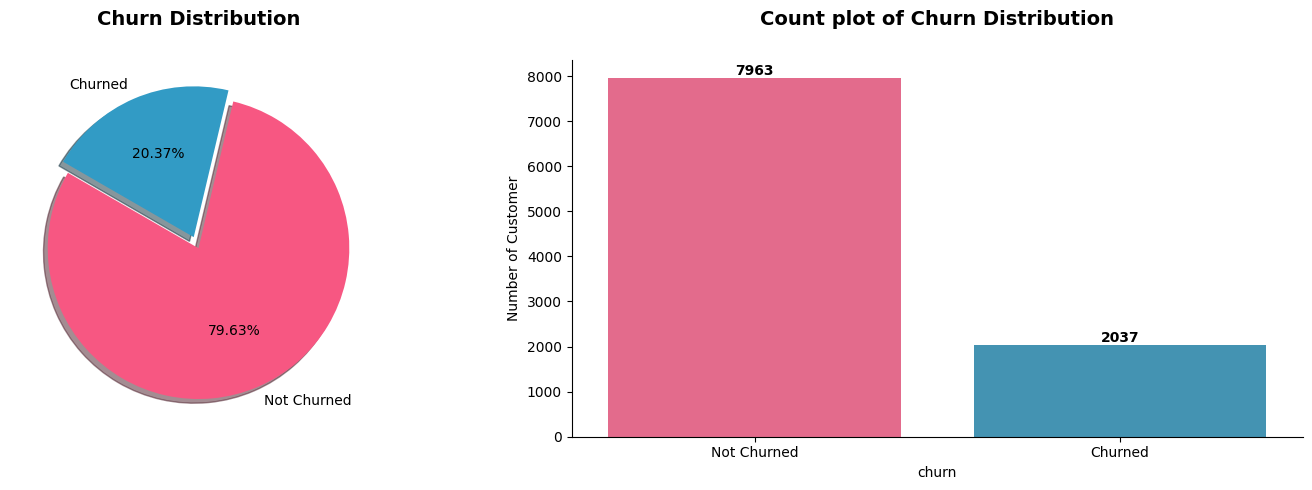

In [245]:
churn_Distribution  = df_customer_churn["churn"].value_counts().loc[[0, 1]]
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(15, 5))
# ax[0]
ax[0].pie(
    churn_Distribution,
    labels = ["Not Churned", "Churned"],
    colors = color(n_colors=2),
    autopct = "%1.2f%%",
    startangle = 150,
    explode = (0, 0.08),
    shadow= True
)
ax[0].set_title("Churn Distribution", weight="bold", fontsize=14, pad=25)

# ax[1]
sns.countplot(data=df_customer_churn, x = "churn", palette=color(n_colors=2), ax=ax[1])
ax[1].set_title("Count plot of Churn Distribution", weight="bold", fontsize=14, pad=25)
for container in ax[1].containers:
    ax[1].bar_label(container, fmt="%d", label_type="edge", fontsize=10, weight="bold")
ax[1].set_ylabel("Number of Customer")
ax[1].set_xticks([0, 1], ["Not Churned", "Churned"])
sns.despine(ax=ax[1], top=True, right=True, left=False, bottom=False)

plt.tight_layout()
plt.show()

**Insights:** <br>
- Around 1 in 5 customers has churned, which reflects a realistic churn rate in the banking sector.
- Although the data is imbalanced, it is not incorrect — it naturally reflects actual customer behavior.

## Numerical Feature Distributions

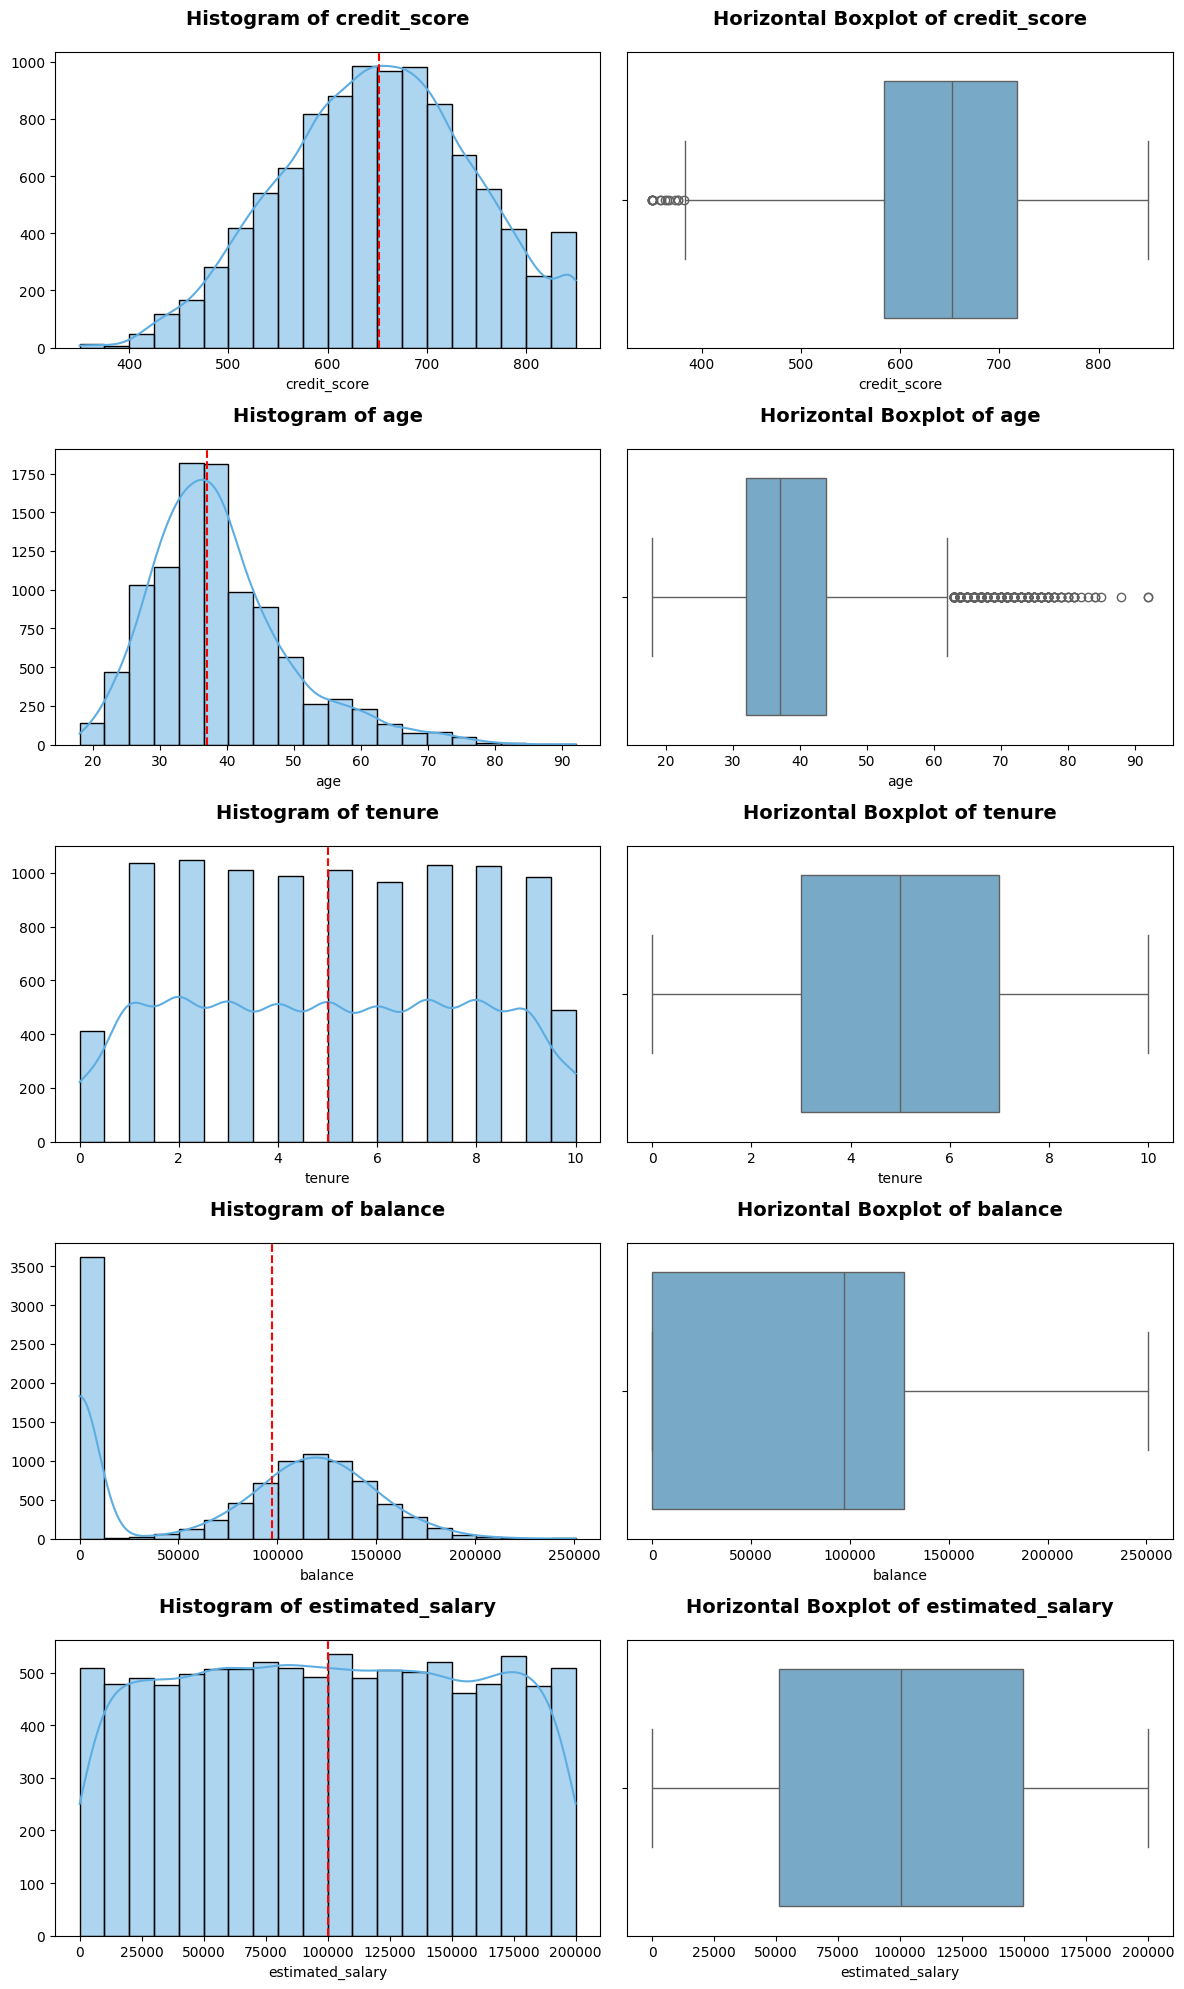

In [246]:
def plot_numerical_features(df=df_customer_churn, numerical_features = num_features):
    fig, axes = plt.subplots(len(numerical_features), 2, figsize=(12, len(numerical_features)*4))
    axes = np.atleast_2d(axes)

    for i, feature in enumerate(numerical_features):
        sns.histplot(data=df[feature], palette="Blues", bins = 20, kde=True, ax=axes[i, 0], color="#5DADE2")
        axes[i, 0].set_title(f"Histogram of {feature}", fontsize=14, weight="bold", pad=20)
        axes[i, 0].set_ylabel("")
        axes[i, 0].axvline(df[feature].median(), color="red", linestyle="--", label="Median Train")

        sns.boxplot(data=df[feature], palette="Blues", orient="h", ax=axes[i, 1], color="#F5B041")
        axes[i, 1].set_title(f"Horizontal Boxplot of {feature}", fontsize=14, weight="bold", pad=20)
        axes[i, 1].set_xlabel(feature)

    plt.tight_layout()
    plt.show()

plot_numerical_features()

In [247]:
def check_skewness(data = df_customer_churn, numerical_features = num_features, highlight=True, sort=True):
    skewness_dict = {}
    skew_feature = []
    for feature in numerical_features:
        skew = data[feature].skew(skipna=True)
        skewness_dict[feature] = skew

    skew_df = pd.DataFrame.from_dict(skewness_dict, orient="index", columns=["Skewness"])
    if sort:
        skew_df = skew_df.reindex(skew_df["Skewness"].abs().sort_values(ascending=False).index)
    else:
        pass
    
    print(f"\n🔍 Skewness for dataset:")
    print("-"*70)
    print(f"{'Feature':<30} | {'Skewness':<10} | {'Remark'}")
    print("-"*70)
    for feature, row in skew_df.iterrows():
        skew = row["Skewness"]
        abs_skew = abs(skew)
        if abs_skew > 1:
            remark = "Highly skewed"
            color = "\033[91m"  
        elif abs_skew > 0.5:
            remark = "Moderately skewed"
            color = "\033[93m"  
        else:
            remark = "Approximately symmetric"
            color = ""
        endc = "\033[0m" if color else ""
        if highlight and color:
            print(f"{color}{feature:<30} | {skew:>+10f} | {remark}{endc}")
            skew_feature.append(feature)
        else:
            print(f"{feature:<30} | {skew:>+10f} | {remark}")
    print("-"*70)
    return skew_feature, skew_df

skew_feature, skew_df = check_skewness()


🔍 Skewness for dataset:
----------------------------------------------------------------------
Feature                        | Skewness   | Remark
----------------------------------------------------------------------
age                            |  +1.011320 | Highly skewed
balance                        |  -0.141109 | Approximately symmetric
credit_score                   |  -0.071607 | Approximately symmetric
tenure                         |  +0.010991 | Approximately symmetric
estimated_salary               |  +0.002085 | Approximately symmetric
----------------------------------------------------------------------


### Overview from Distribution Plots

* **Credit Score**: Approximately normal, centered around 650. Few outliers.
* **Age**: Right-skewed. Most customers are 30–40 years old, fewer above 70. Some outliers present.
* **Tenure**: Nearly uniform distribution across 0–10 years, no clear bias.
* **Balance**: Many customers have **zero balance**, while some hold very high amounts → strong variation.
* **Estimated Salary**: Roughly **uniform distribution** within 0–200k, no significant outliers.

👉 Overall: Data is fairly clean. Only **Age** shows right skewness, and **Balance** has strong variation (zero vs. very high). Both are key features for churn analysis and modeling.

## Correlation Analysis of Numerical Features

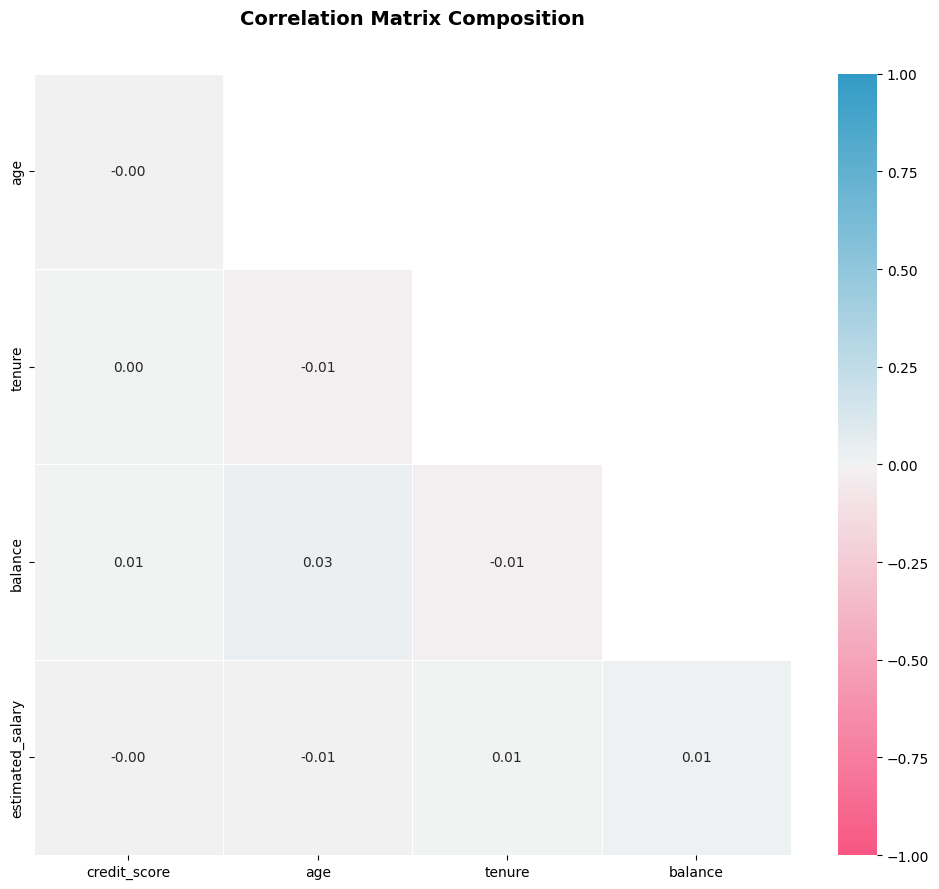

In [248]:
corr_matrix = df_customer_churn.drop(columns="churn", axis=1).corr(numeric_only=True)
# one_like can build a matrix of boolean(True, False) with the same shape as our data
ones_corr = np.ones_like(corr_matrix, dtype=bool)
mask = np.triu(ones_corr)
adjusted_mask = mask[1:, :-1]
adjusted_cereal_corr = corr_matrix.iloc[1:, :-1]

fig, ax = plt.subplots(figsize = (10, 9))
# That method uses HUSL colors, so you need hue, saturation, and lightness. 
# I used hsluv.org to select the colors of this chart.
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

sns.heatmap(data=adjusted_cereal_corr, mask=adjusted_mask,
            annot=True, fmt=".2f", cmap=cmap,
            vmin=-1, vmax=1, linecolor="white", linewidths=0.5)

title = "Correlation Matrix Composition\n"
ax.set_title(title, loc='center', fontsize=14, weight="bold", pad=20)

plt.tight_layout()
plt.show()

### Insights from Correlation Analysis of Numerical Features

**Overall Weak Correlations:** Most correlation coefficients are extremely close to zero, indicating very weak or no linear relationship between the numerical features.

**Implications for Modeling**

- The near-zero correlations imply that each numerical feature provides **unique, non-redundant information**.
- Since multicollinearity is not an issue, these features can be safely used together in models like linear regression or tree-based methods.

## Categorical Feature Distributions

In [249]:
# Function to display barplot and pie chart for categorical columns
def plot_categorical_distribution(feature, df = df_customer_churn, order = None, labels_text = None):
    fig, ax = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(12, 5))

    sns.countplot(data=df, y = feature, ax=ax[0],
                  palette=color(n_colors=len(df[feature].unique())), order=order)
    ax[0].set_title(f"Count plot of {feature}", fontsize=14, pad=25, weight = "bold")
    ax[0].set_ylabel(feature)
    ax[0].set_xlabel("")
    if feature in ["credit_card", "active_member"]:
        ax[0].set_yticks(['0', '1'])
        ax[0].set_yticklabels(labels_text, weight = "bold")
    # ax[0].grid(axis="x", color="gray", linestyle=":", linewidth=0.7)
    sns.despine(ax=ax[0], top=True, right=True, left=False, bottom=False)

    for p in ax[0].patches:
        width = p.get_width()
        y = p.get_y() + p.get_height() / 2
        ax[0].text(width + max(df[feature].value_counts())*0.01, y,
                f"{int(width)}", 
                ha="left", va="center", fontsize=10, fontweight="bold", color="black")

    feature_counts = df[feature].value_counts().sort_index()
    labels = []
    if feature in ["credit_card", "active_member"]:
        labels=labels_text
    else:
        labels=feature_counts.index

    wedges, texts, autotexts = ax[1].pie(
        feature_counts,
        labels=labels,
        autopct="%1.1f%%",
        startangle=90,
        colors=color(n_colors=len(df[feature].unique())),
        wedgeprops=dict(width=0.4, edgecolor="w"),
        radius=1.2
    )

    for text in texts + autotexts:
        text.set_fontsize(10)
        text.set_fontweight("bold")

    centre_circle = plt.Circle((0, 0), 0.70, fc="white")
    ax[1].add_artist(centre_circle)
    ax[1].set_title(f"Percentage Distribution of {feature}", pad=25, weight = "bold")
    ax[1].axis("equal")

    plt.tight_layout()
    plt.show()

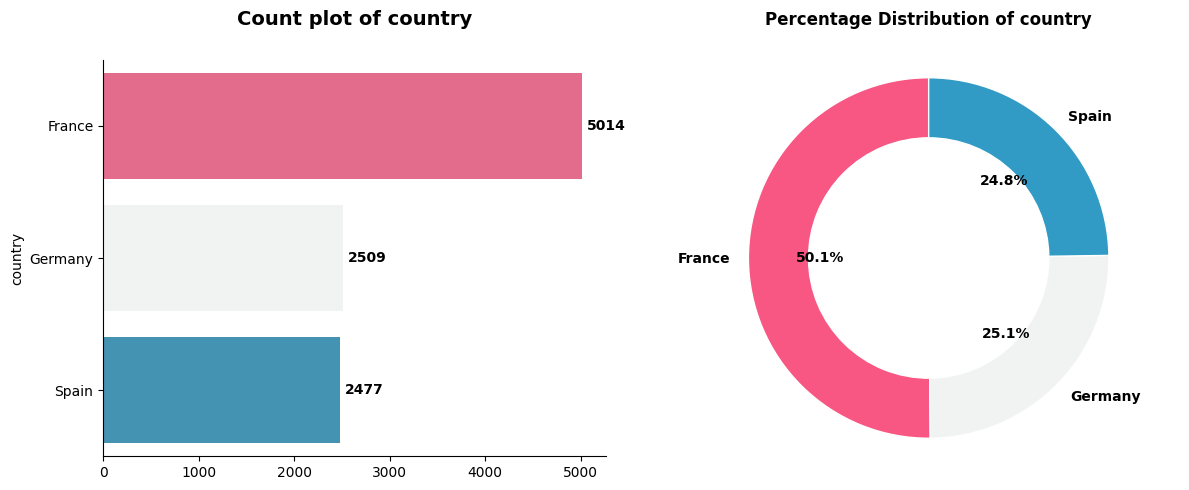

In [250]:
plot_categorical_distribution(feature="country")

**Country Distribution Overview**
* **France** accounts for **~50%** of customers → largest market.
* **Germany** and **Spain** share nearly equal proportions (**~25%** each).
* Customer distribution is **imbalanced**, heavily concentrated in France.

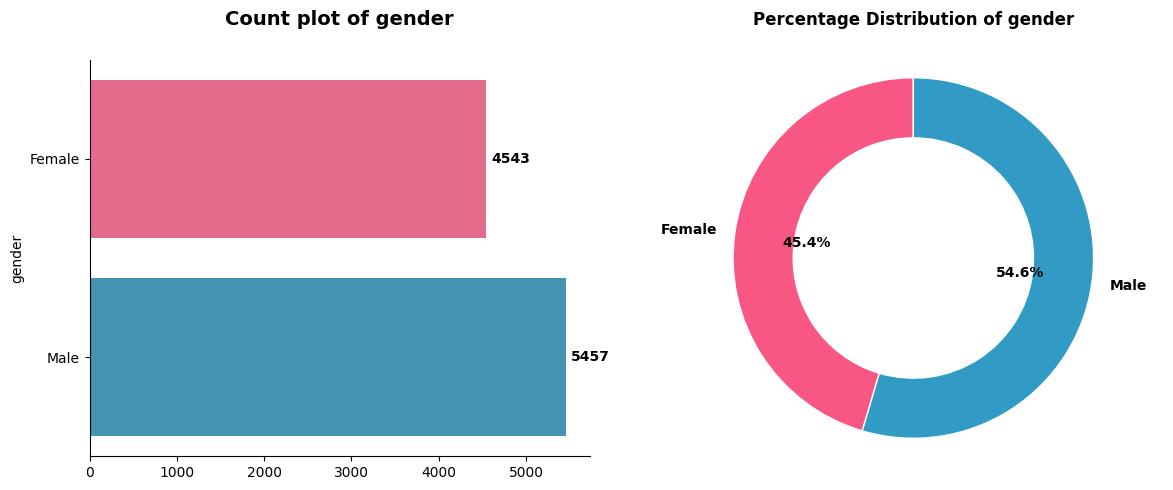

In [251]:
plot_categorical_distribution(feature="gender")

**Gender** <br>
- There is a slight gender imbalance in the dataset, with male customers forming the majority group.

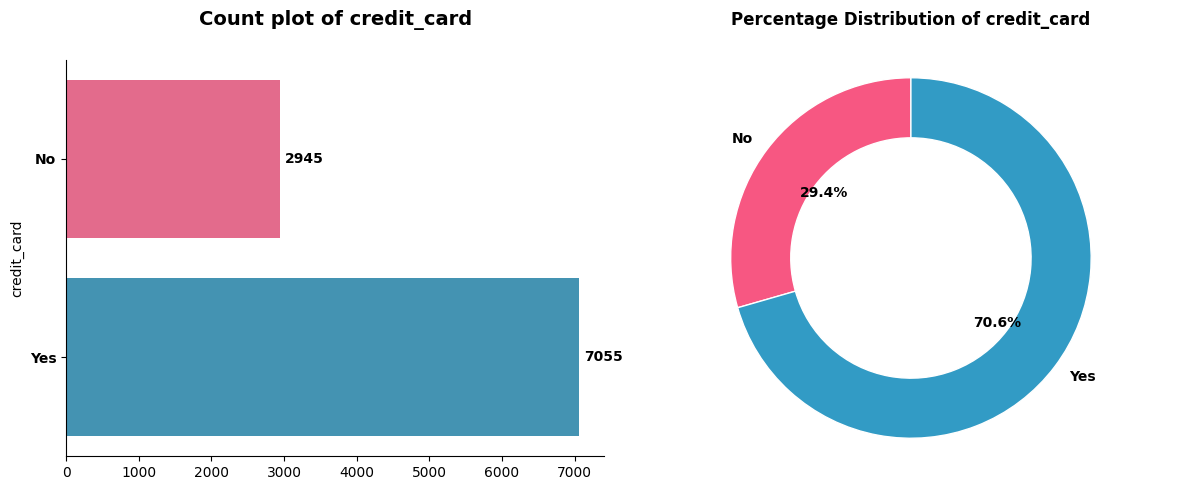

In [252]:
plot_categorical_distribution(feature="credit_card", labels_text=["No", "Yes"])

**credit_card**:
- The group with credit cards represents the majority, nearly 2.4 times larger than the group without cards.

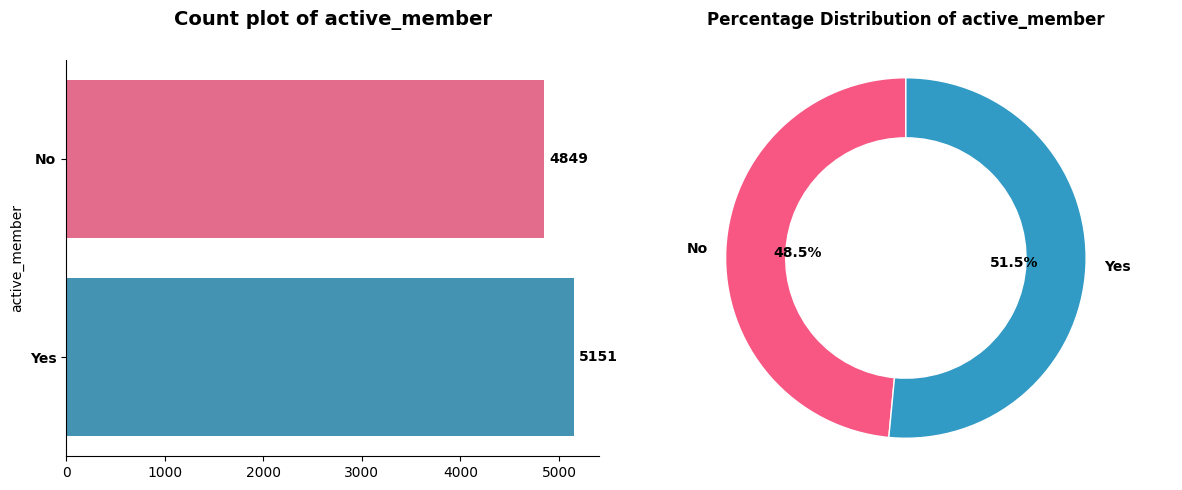

In [253]:
plot_categorical_distribution(feature="active_member", labels_text=["No", "Yes"])

**active_member**
- This near-equal ratio indicates no significant bias. Such balanced distribution is useful in statistical analysis.

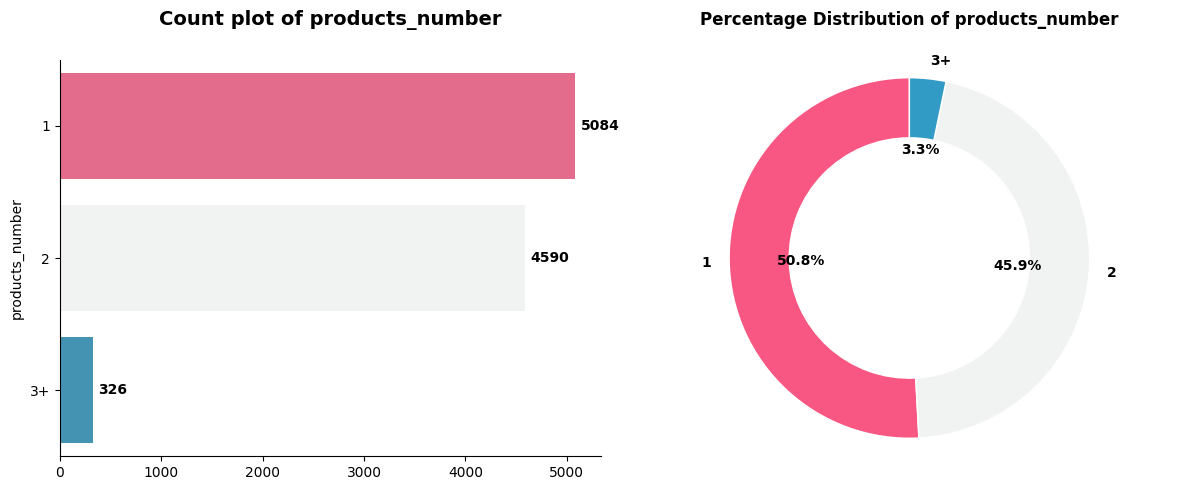

In [254]:
df_customer_churn["products_number"] = df_customer_churn["products_number"].apply(lambda x: "3+" if x > 2 else str(x))
df_customer_churn["products_number"] = df_customer_churn["products_number"].astype("category")
plot_categorical_distribution(feature="products_number")

**products_number**

**Most customers only use 1–2 products**, while multi-product customers are rare → indicating strong **cross-sell/up-sell opportunities**.

## Bivariate Analysis

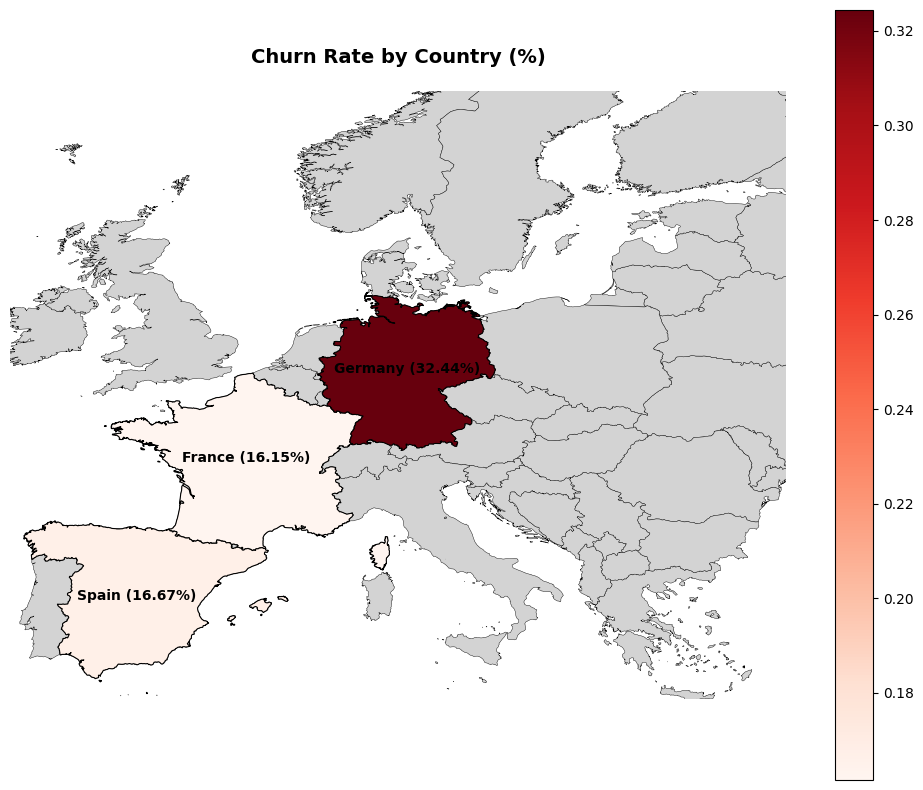

In [255]:
def geography_distribution(df=df_customer_churn):
    import geopandas as gpd
    # 1. Calculate churn rate by country: mean() = % of customers who exited
    churn_rate_by_geo = df.groupby("country")["churn"].mean()

    # 2. Load geojson file (country names must match the "admin" column)
    world = gpd.read_file("custom.geo.json")

    # 3. Map churn rate to each country
    world["churn_rate"] = world["admin"].map(churn_rate_by_geo)

    # 4. Plotting
    fig, ax = plt.subplots(figsize=(10, 8))

    # Draw base map (entire Europe in grey)
    world.plot(ax=ax, color="#D3D3D3", edgecolor="black", linewidth=0.3)

    # Highlight countries that have churn data
    highlighted = world[world["churn_rate"].notnull()]
    highlighted.plot(ax=ax, column="churn_rate", cmap="Reds", edgecolor="black", linewidth=0.8, legend=True)

    # Annotate country names and churn rates
    for idx, row in highlighted.iterrows():
        point = row["geometry"].representative_point()
        plt.annotate(
            text=f"{row['admin']} ({row['churn_rate'] * 100:.2f}%)",
            xy=(point.x, point.y),
            ha="center",
            fontsize=10,
            color="black",
            weight="bold"
        )

    ax.set_xlim(-10, 30)
    ax.set_ylim(35, 65)
    ax.axis("off")
    ax.set_title("Churn Rate by Country (%)", fontsize=14, pad=20, weight="bold")

    plt.tight_layout()
    plt.show()

geography_distribution()

In [256]:
from IPython.core.display import HTML
# defining function for plotting
def bivariate_percent_plot(cat, df, figsize=(15, 6), order = None, rot = 0):
    
    display(HTML(f"<h2 style='text-align:center; font-size:22px; color:green;'><b>Distribution of {cat} by Churn</b></h2>"))
    fig, ax = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=figsize)
    # Plot 1
    # Calculate the total number of each "cat" by Churn
    grouped = df.groupby([cat, "churn"]).size().unstack(fill_value=0)
    # Calculate the percentages
    percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100
    if order is not None:
        percentages = percentages.loc[order]
        labels = order
    else:
        labels = percentages.index

    # That method uses HUSL colors, so you need hue, saturation, and lightness. 
    # I used hsluv.org to select the colors of this chart.
    cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
    # Draw stacked bar plot
    ax[0] = percentages.plot(kind="bar", stacked=True, cmap=cmap, ax = ax[0], use_index=True)
    for container in ax[0].containers:
        ax[0].bar_label(container, fmt='%1.2f%%', label_type="center", weight="bold", fontsize=10)

    ax[0].set_title(f"Percentage of Churn by {cat}", fontsize=14, weight="bold", pad=20)
    ax[0].set_xlabel(f"{cat}", fontsize=12)
    ax[0].set_ylabel("% Churn Rate", fontsize=12)
    ax[0].set_xticklabels(labels = labels, rotation = 0)
    ax[0].legend_.remove()
    sns.despine(left=False, bottom=False, ax=ax[0])

    # Plot 2
    sns.countplot(data=df, hue = "churn", x = cat,
                palette=color(n_colors=2), ax=ax[1], order=order)
    # Show value for each bar.
    for container in ax[1].containers:
        ax[1].bar_label(container, fmt='%d', label_type="edge", fontsize=10, weight="bold")

    ax[1].set_title(f"Churn by {cat}", fontsize=14, weight="bold", pad=20)
    ax[1].set_xlabel(f"{cat}", fontsize=12)
    ax[1].set_ylabel("Number of Customer", fontsize=12)
    ax[1].legend(title="Churn", bbox_to_anchor=(1.05, 1), loc="upper left")
    sns.despine(left=False, bottom=False, ax=ax[1])
    plt.tight_layout()
    plt.show()

    cal_ChiSquare(cat_feature=cat, target_feature="churn", df=df, show_residuals=True)

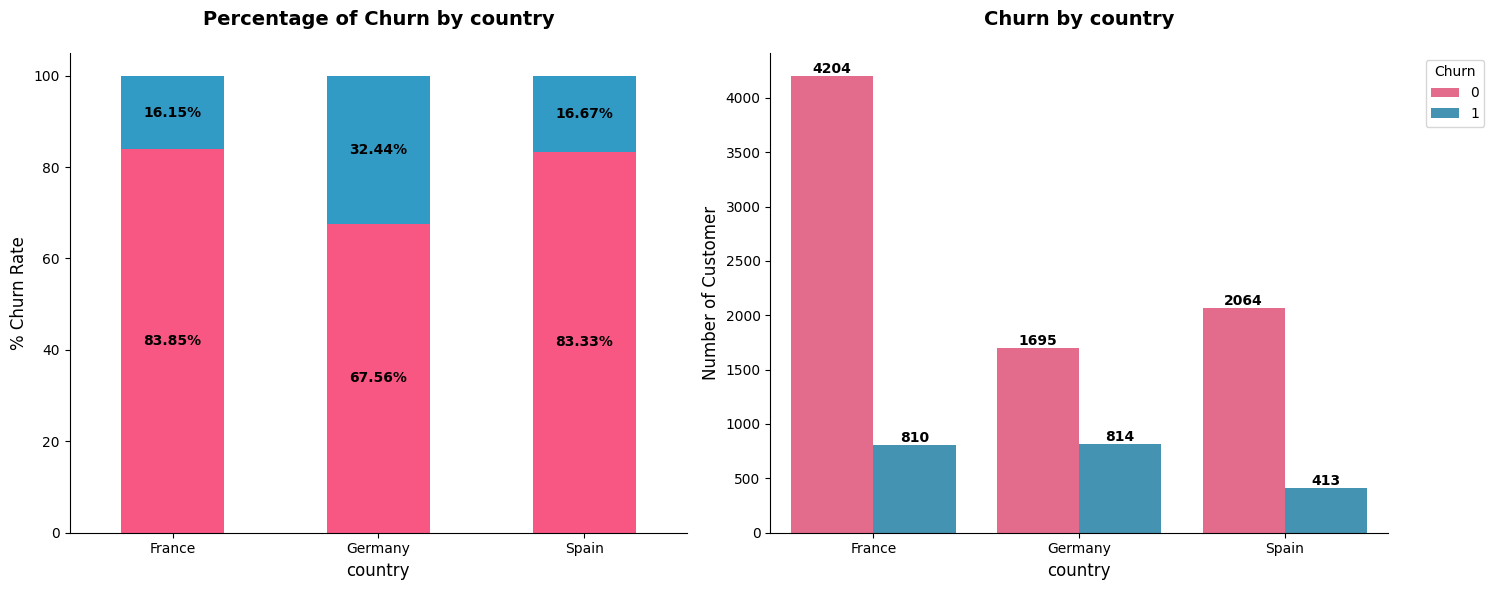


🔍 Chi-Square Test of Independence: 'country' vs. 'churn'
Chi-squared statistic: 301.25533682434536
Degrees of freedom: 2
p-value: 3.8303176053541544e-66
✅ Result: p-value < 0.05 → Reject H₀
→ There is a **statistically significant association** between 'country' and 'churn'.

📈 Standardized Residuals:
churn       0      1
country             
France   3.34  -6.61
Germany -6.78  13.40
Spain    2.06  -4.08


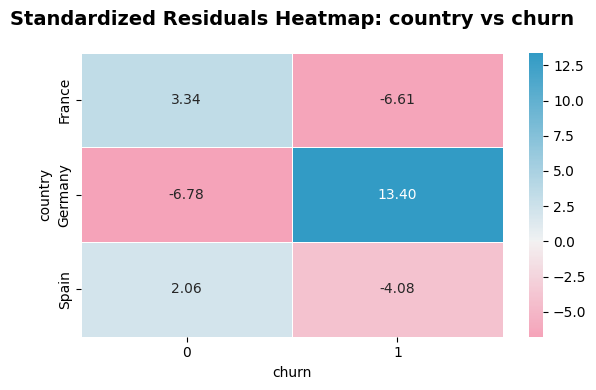

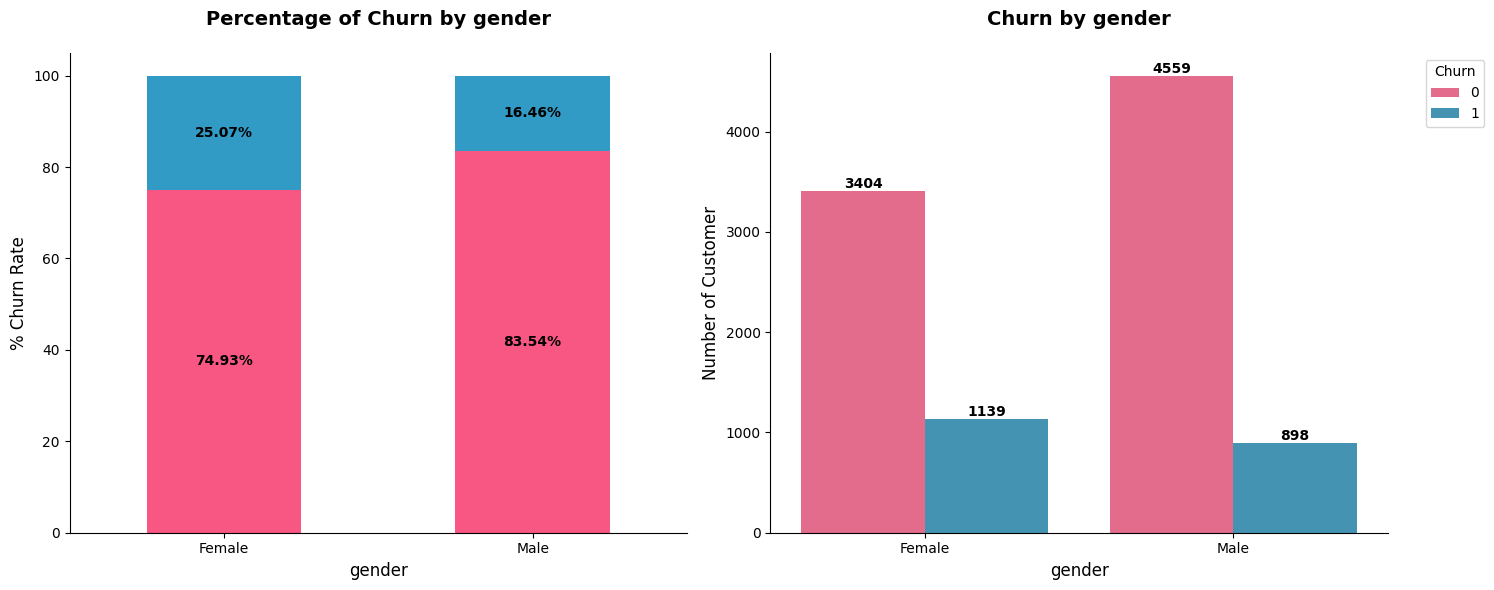


🔍 Chi-Square Test of Independence: 'gender' vs. 'churn'
Chi-squared statistic: 112.91857062096116
Degrees of freedom: 1
p-value: 2.2482100097131755e-26
✅ Result: p-value < 0.05 → Reject H₀
→ There is a **statistically significant association** between 'gender' and 'churn'.

📈 Standardized Residuals:
churn      0     1
gender            
Female -3.55  7.02
Male    3.24 -6.41


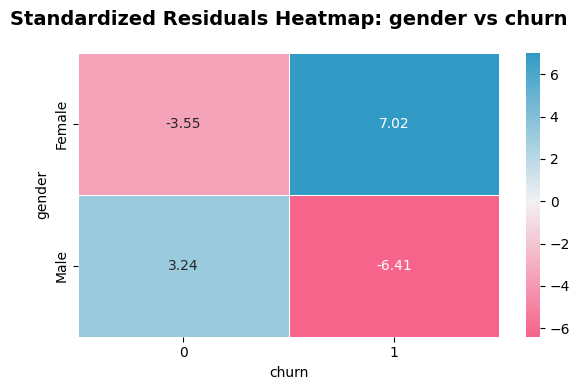

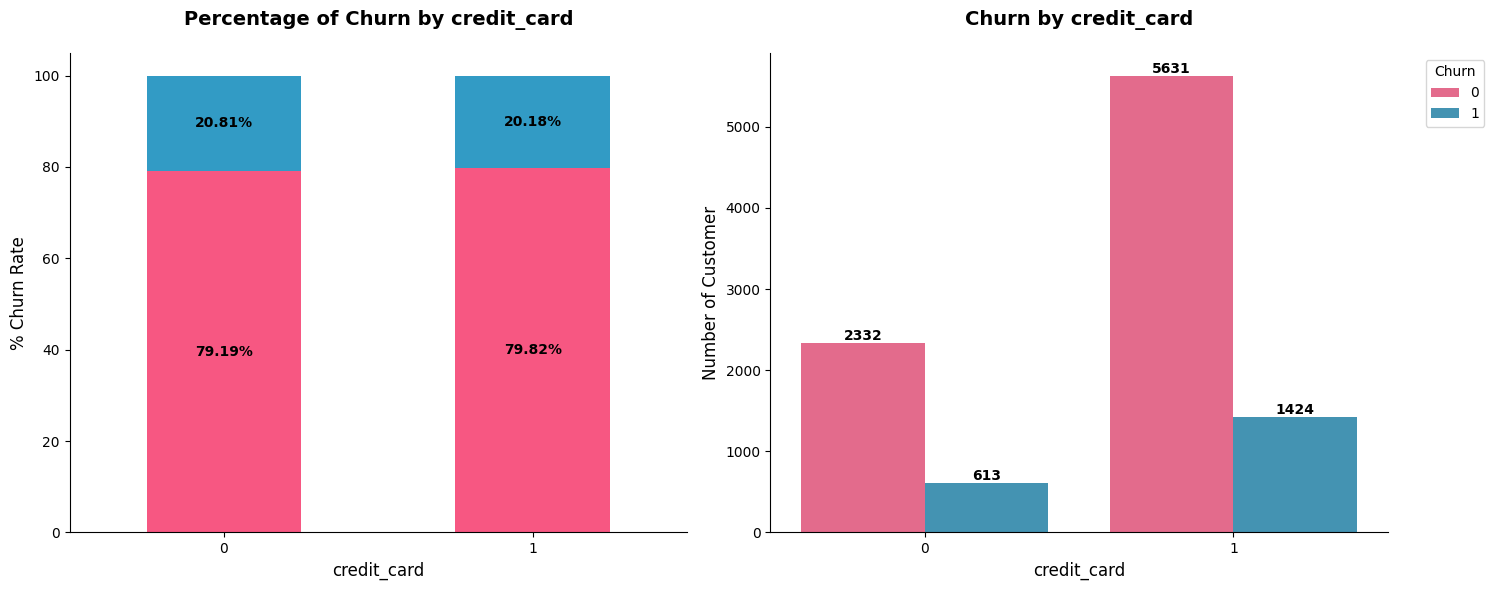


🔍 Chi-Square Test of Independence: 'credit_card' vs. 'churn'
Chi-squared statistic: 0.47133779904440803
Degrees of freedom: 1
p-value: 0.49237236141554697
❎ Result: p-value ≥ 0.05 → Fail to reject H₀
→ No statistically significant association between 'credit_card' and 'churn'.

📈 Standardized Residuals:
churn           0     1
credit_card            
0           -0.27  0.53
1            0.17 -0.35


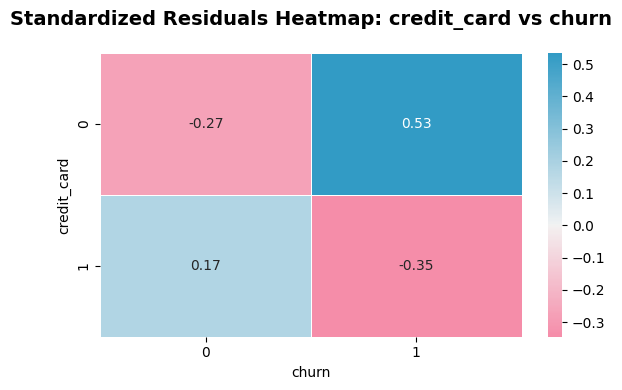

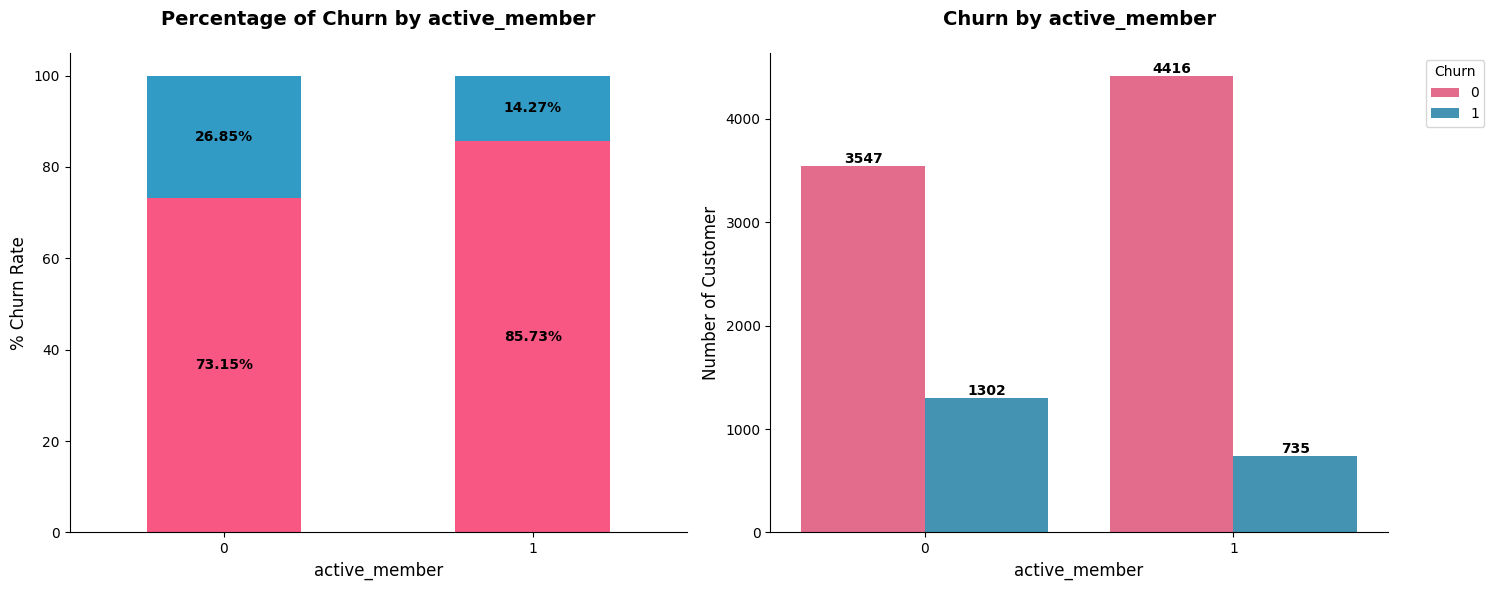


🔍 Chi-Square Test of Independence: 'active_member' vs. 'churn'
Chi-squared statistic: 242.98534164287963
Degrees of freedom: 1
p-value: 8.785858269303705e-55
✅ Result: p-value < 0.05 → Reject H₀
→ There is a **statistically significant association** between 'active_member' and 'churn'.

📈 Standardized Residuals:
churn             0     1
active_member            
0             -5.06  10.0
1              4.91  -9.7


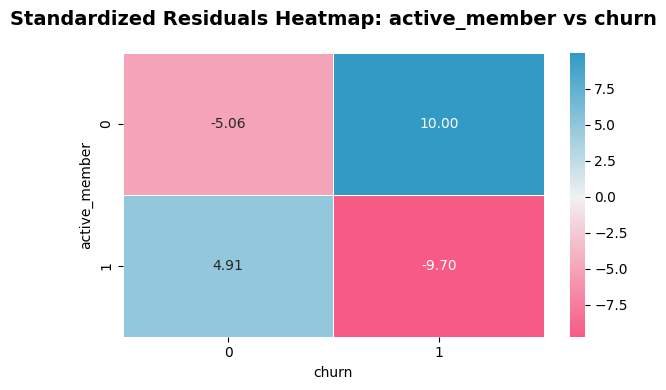

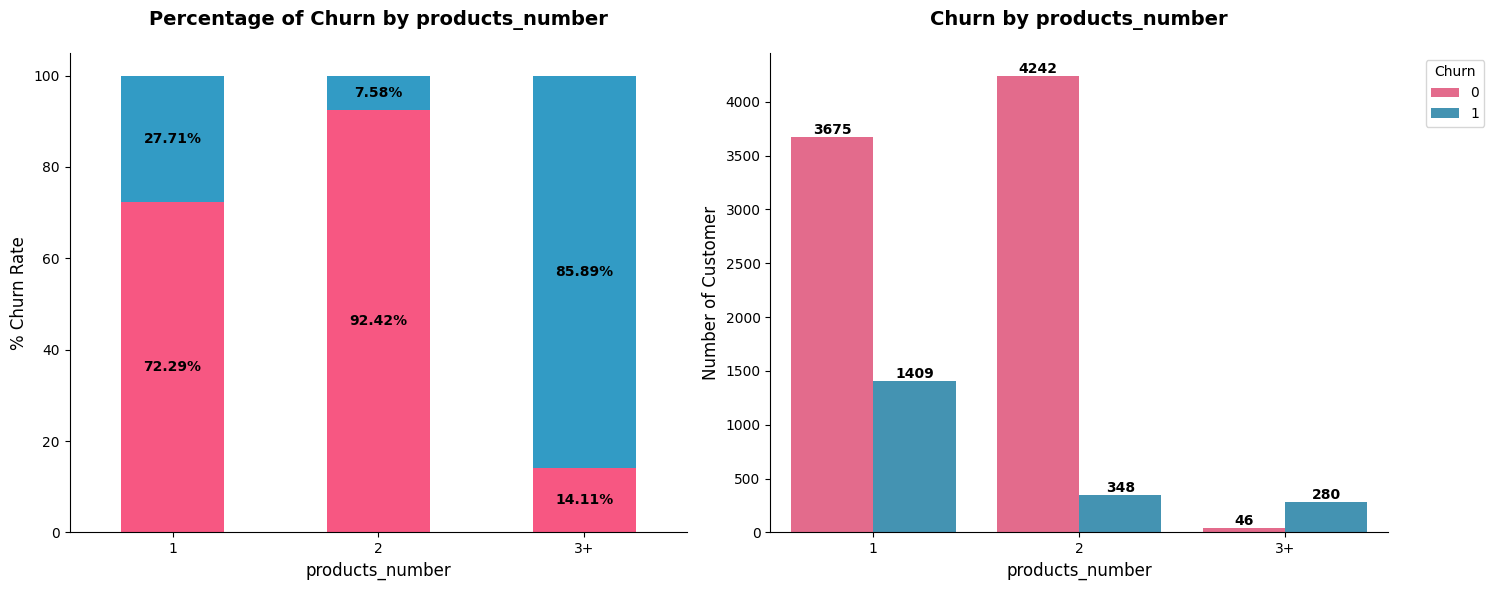


🔍 Chi-Square Test of Independence: 'products_number' vs. 'churn'
Chi-squared statistic: 1494.6032658389202
Degrees of freedom: 2
p-value: 0.0
✅ Result: p-value < 0.05 → Reject H₀
→ There is a **statistically significant association** between 'products_number' and 'churn'.

📈 Standardized Residuals:
churn                0      1
products_number              
1                -5.87  11.60
2                 9.71 -19.20
3+              -13.26  26.21


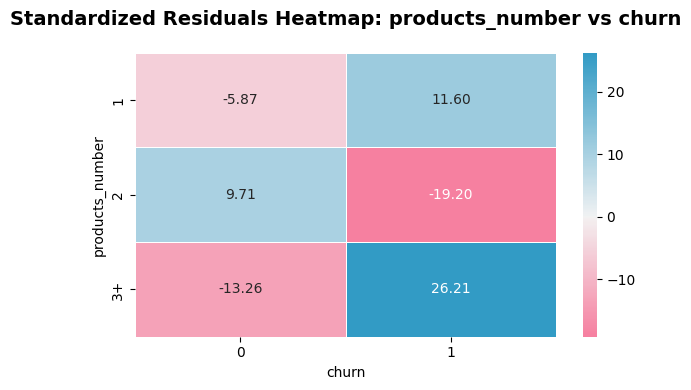

In [257]:
for feature in cat_features:
    bivariate_percent_plot(cat=feature, df= df_customer_churn)

### Insight for Categorical Features by Attrition

**Country**

* Strong, significant relationship with churn.
* **Germany → higher churn** (residual +13.38).
* **France & Spain → lower churn**, especially France (residual -6.60).
* 👉 **Geography = key factor** in churn analysis & retention strategy.

**Gender**

* **Significant factor** affecting churn.
* **Females churn more** than males.
* 👉 Need **gender-tailored retention strategy**, focusing on female customers.

**Credit Card**

* No significant relationship with churn (p = 0.5026).
* Standardized residuals ≈ 0 → no meaningful deviation.
* 👉 **Credit card ownership not predictive** of churn.

**Active Member**

* **Strong link with churn**.
* **Inactive → higher churn**, Active → more likely to stay.
* 👉 **Customer activity status = key churn driver**.

**Products Number**

* Strong, significant relationship with churn.
* **1, 3, 4 products → higher churn** than expected.
* 👉 **NumOfProducts is critical** for churn modeling & retention.

,churn,Count,Mean,Median,Std
0,0,7963,651.853196,653.000000,95.653837
1,1,2037,645.351497,646.000000,100.321503


🔎 D’Agostino and Pearson Normality Test for 'credit_score' across 'churn' groups

 Group: 1 (n = 2037)
  Statistic : 15.110
  p-value   : 0.00052
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 0 (n = 7963)
  Statistic : 142.636
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'credit_score' by 'churn'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 7839548.0
p-value     : 0.019868661172728338

✅ Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: Group '0' has a higher median 'credit_score' than Group '1'.


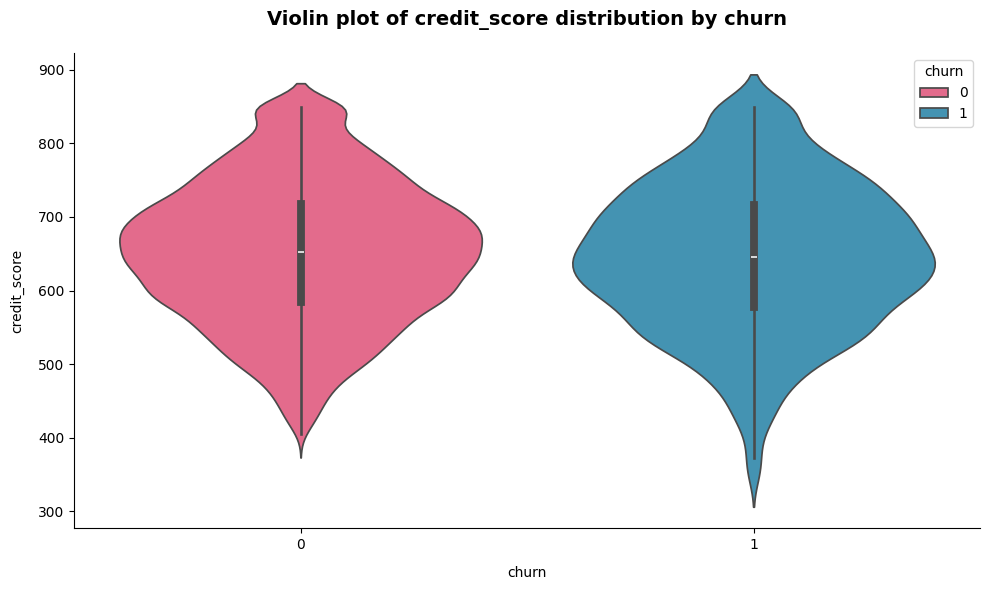

,churn,Count,Mean,Median,Std
1,1,2037,44.837997,45.000000,9.761562
0,0,7963,37.408389,36.000000,10.125363


🔎 D’Agostino and Pearson Normality Test for 'age' across 'churn' groups

 Group: 1 (n = 2037)
  Statistic : 3.406
  p-value   : 0.18215
  🟢 Interpretation: Data appears to follow a normal distribution.

 Group: 0 (n = 7963)
  Statistic : 2023.972
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'age' by 'churn'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 11874649.5
p-value     : 3.2104014319371675e-230

✅ Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: Group '1' has a higher median 'age' than Group '0'.


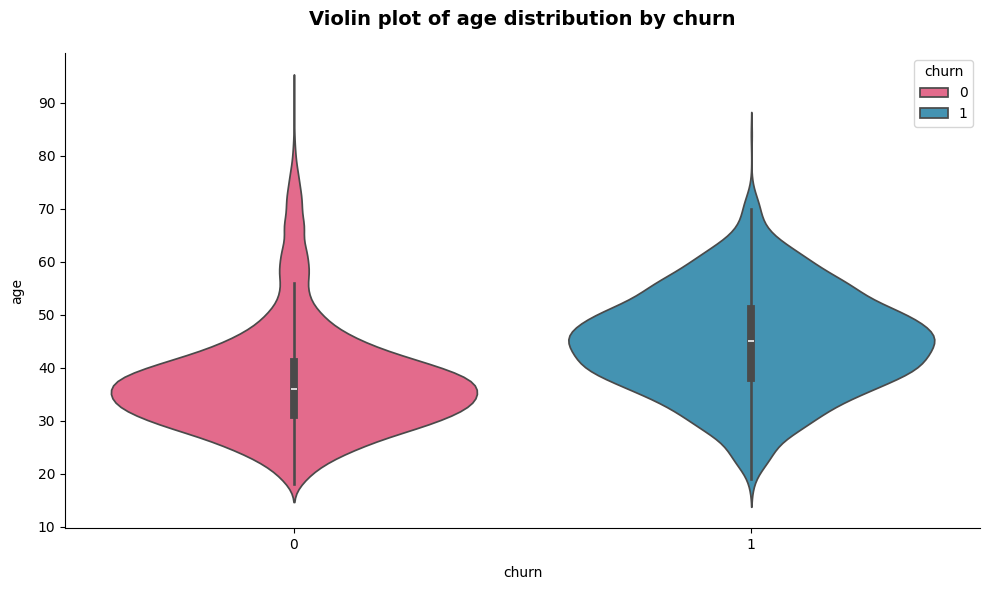

,churn,Count,Mean,Median,Std
0,0,7963,5.033279,5.000000,2.880658
1,1,2037,4.932744,5.000000,2.936106


🔎 D’Agostino and Pearson Normality Test for 'tenure' across 'churn' groups

 Group: 1 (n = 2037)
  Statistic : 1369.892
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 0 (n = 7963)
  Statistic : 4986.019
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'tenure' by 'churn'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 7948575.5
p-value     : 0.16219376122918827

⚪ Result: No statistically significant difference between the two groups (Fail to reject H₀).


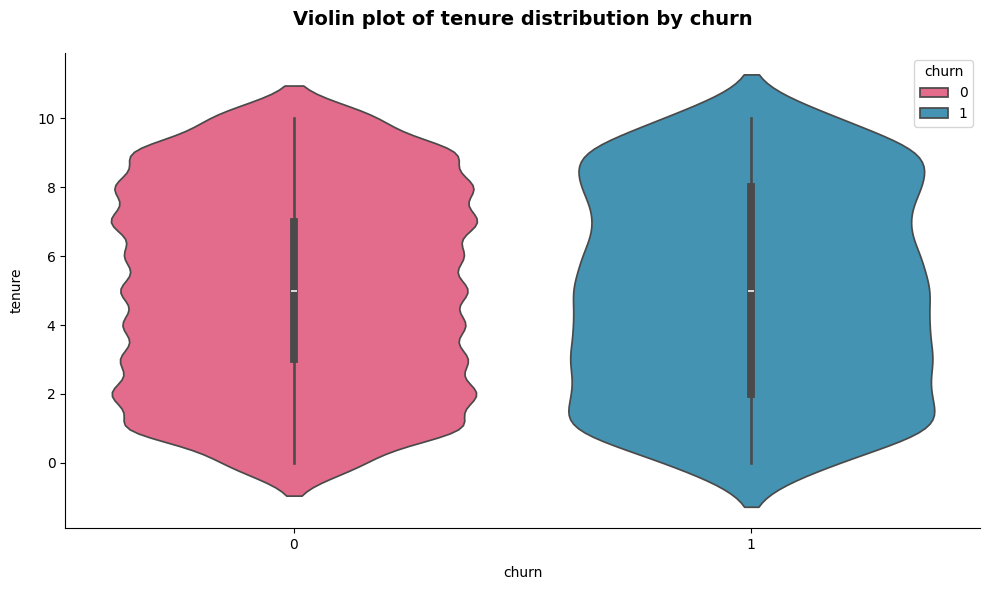

,churn,Count,Mean,Median,Std
1,1,2037,91108.539062,109349.289062,58360.794782
0,0,7963,72745.296875,92072.679688,62848.040678


🔎 D’Agostino and Pearson Normality Test for 'balance' across 'churn' groups

 Group: 1 (n = 2037)
  Statistic : 393.452
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 0 (n = 7963)
  Statistic : 42771.110
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'balance' by 'churn'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 9371186.5
p-value     : 1.1158399379149222e-28

✅ Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: Group '1' has a higher median 'balance' than Group '0'.


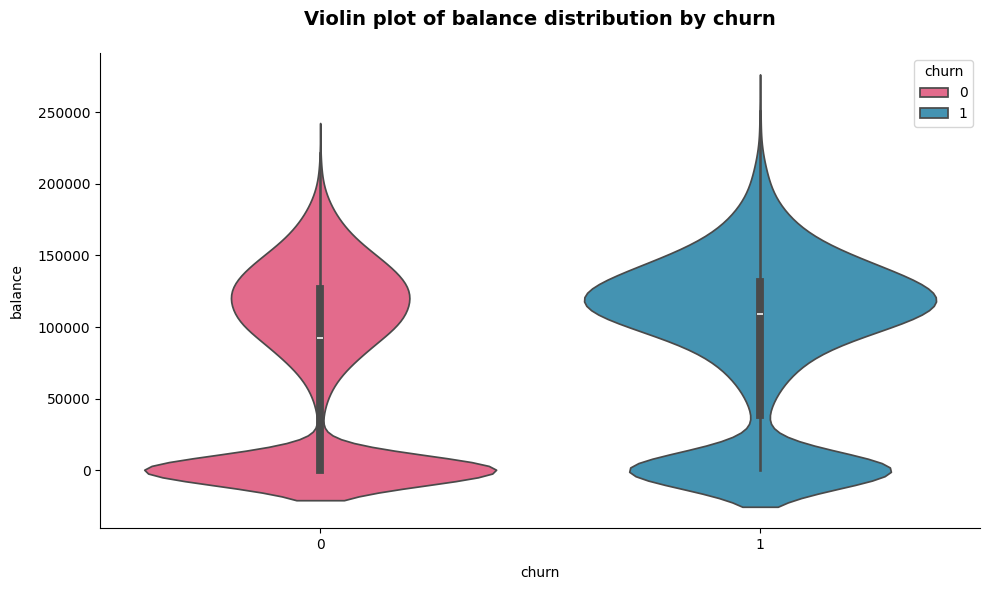

,churn,Count,Mean,Median,Std
1,1,2037,101465.679688,102460.843750,57912.418058
0,0,7963,99738.390625,99645.039062,57405.586960


🔎 D’Agostino and Pearson Normality Test for 'estimated_salary' across 'churn' groups

 Group: 1 (n = 2037)
  Statistic : 1826.673
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 0 (n = 7963)
  Statistic : 5459.953
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'estimated_salary' by 'churn'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 8250768.0
p-value     : 0.22705150930153783

⚪ Result: No statistically significant difference between the two groups (Fail to reject H₀).


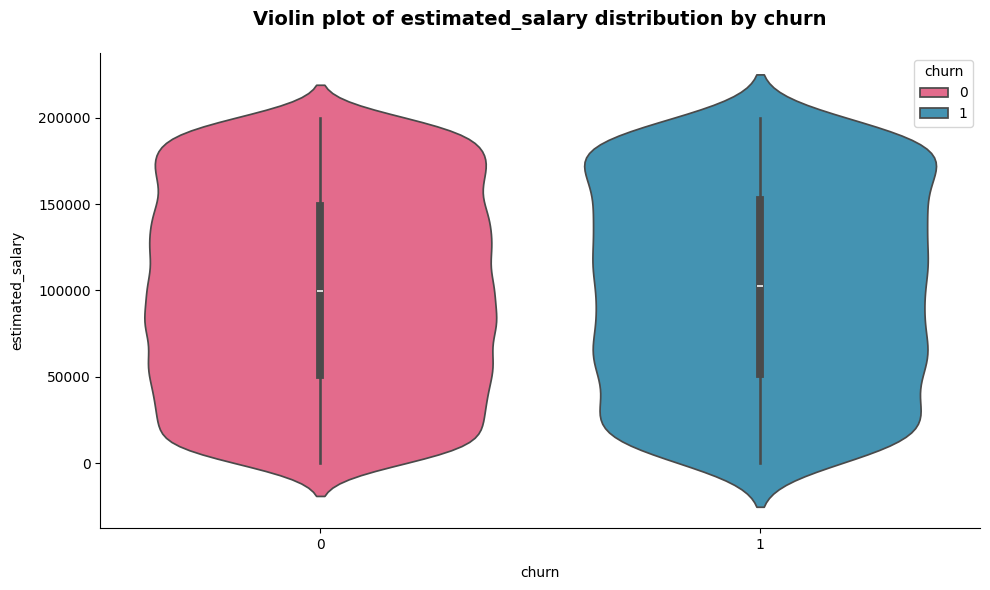

In [258]:
def perform_statical_testing(feature, df = df_customer_churn, total_categories = 2, target_feature = "churn"):
    cal_normaltest(cat_feature=target_feature, num_feature=feature, df=df)
    if total_categories == 2:
        cal_mannwhitneyu(dataframe=df, categorical_feature=target_feature, num_feature=feature)
    else:
        pass

def plot_numerical_distribution_by_Exited(feature, df = df_customer_churn, target_feature = "churn", order = None):
    """
    Performs statical testing for each groups (distribution by target_feature) by Mann-Whitney U test,... <br>
    Draw violinplot and histogram to display the distribution for each groups of feature.
    Parameters:
        feature (str): The name of the column representing the numerical variable.
        df (pd.DataFrame): The input dataset.
        target_feature (str): The name of the column representing the target feature.
        order (list): Order items in plot.

    Returns:
        None
    """
    display(HTML(f"<h2 style='text-align:center; font-size:22px; color:green;'><b>Distribution of {feature} by Churn</b></h2>"))
    # Summary information
    df_summary_feature = df.groupby(by = target_feature, as_index= False)\
    .agg (
        Count = (feature, "count"),
        Mean = (feature, "mean"),
        Median = (feature, "median"),
        Std = (feature, "std")
    )
    df_summary_feature = df_summary_feature.sort_values(by="Mean", ascending=False)    

    summary_data = [
        ("Overall Mean", f"{df[feature].mean():.2f}"),
        ("Overall Median", f"{df[feature].median()}"),
        ("Overall Std", f"{df[feature].std():.2f}")
    ]
    summary_html = "<ul>" + "".join([f"<li><b>{k}:</b> {v}</li>" for k, v in summary_data]) + "</ul>"
    display(HTML(summary_html))
    display(df_summary_feature.style.background_gradient(cmap=cm).set_table_attributes('style="width:75%; margin:auto;"'))

    perform_statical_testing(feature=feature, target_feature=target_feature)

    # Plot distribution
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.violinplot(x=target_feature, y=feature, data=df, hue=target_feature,
                   palette=color(n_colors=len(df[target_feature].unique())), ax=ax)
    ax.set_title(f"Violin plot of {feature} distribution by {target_feature}",
                 pad=20, weight = "bold", fontsize=14)
    ax.set_xlabel(target_feature, labelpad=10)
    ax.set_ylabel(feature, labelpad=10)
    sns.despine(left=False, bottom=False, ax=ax)
    plt.tight_layout()
    plt.show()

for feature in num_features:
    plot_numerical_distribution_by_Exited(feature=feature)

### Insight Numerical Features by Churn

`credit_score` <br>
* There is a statistically significant difference in credit scores between customers who churned and those who did not (p-value ≈ 0.0217 < 0.05).
* The non-churn group has a higher median credit score (653 vs. 646). <br>

-> The variable *credit_score* appears to have some influence on churn behavior; however, the impact is relatively minor due to the small difference observed.

`age` <br>
- There is a statistically significant difference in age between churned and retained customers.
- The median age of churned customers is higher (45 vs. 36), suggesting older individuals are more likely to leave. <br>

-> This suggests that age is a significant predictor of customer churn, with older customers being more likely to exit.

`tenure` <br>
- The Mann-Whitney U test indicates no statistically significant difference in tenure between customers who left and those who stayed.
- With a p-value of 0.17 > 0.05, we fail to reject the null hypothesis, meaning the distribution of tenure is similar across both groups.

`balance` <br>
- The test results show a statistically significant difference in account balance between customers who stayed and those who exited.
- Customers who exited have a higher median balance (109,344 vs. 92,063)

-> This suggests that Balance is a significant predictor of customer churn, with higher balance being more likely to exit.

`estimated_salary`<br>
- The Mann-Whitney U test indicates no statistically significant difference in tenure between customers who left and those who stayed.
- With a p-value > 0.05, we fail to reject the null hypothesis, meaning the distribution of PointEarned and estimated_salary are similar across both groups.

### Overall Picture

| Feature            | Type        | Statistical Test Used | Relationship with Exited | Summary                                                                  |
| ------------------ | ----------- | --------------------- | ------------------------ | ------------------------------------------------------------------------ |
| **country**      | Categorical | Chi-Square Test       | ✅ Significant            | Customers from **Germany** are more likely to churn, **France** less so. |
| **gender**         | Categorical | Chi-Square Test       | ✅ Significant            | **Female** customers have a slightly higher churn rate than males.       |
| **active_member** | Categorical | Chi-Square Test       | ✅ Significant            | **Inactive** customers are more likely to churn.                         |
| **products_number**  | Categorical | Chi-Square Test       | ✅ Significant            | Customers with **1, 3, 4 products** tend to churn less.                |
| **credit_score**    | Numerical   | Mann–Whitney U Test   | ✅ Significant            | Non-churned customers have slightly **higher median credit scores**.     |
| **age**            | Numerical   | Mann–Whitney U Test   | ✅ Significant            | Churned customers tend to be **older on median**.                       |
| **balance**        | Numerical   | Mann–Whitney U Test   | ✅ Significant            | Churned customers have a **notably higher median balance**.              |


## Multivariate Analysis

(Let's address some business questions)

### Why do females have a higher churn rate compared to males?

In [259]:
df_customer_churnma = df_customer_churn.copy()
# Create summary table by gender
def gender_churn_summary(df):
    summary = df.groupby("gender").agg(
        Avg_Balance=("balance", "mean"),
        Percent_Inactive=("active_member", lambda x: (x == 0).mean()),
        Avg_Age=("age", "mean"),
        Avg_CreditScore = ("credit_score", "mean"),
        Avg_EstimatedSalary = ("estimated_salary", "mean"),
        Count=("churn", "count")
    ).reset_index()

    # Format percentages for readability
    summary["Percent_Inactive"] = (summary["Percent_Inactive"] * 100).round(2)
    summary["Avg_Balance"] = summary["Avg_Balance"].round(0)
    summary["Avg_CreditScore"] = summary["Avg_CreditScore"].round(0)
    summary["Avg_EstimatedSalary"] = summary["Avg_EstimatedSalary"].round(0)
    summary["Avg_Age"] = summary["Avg_Age"].round(1)

    return summary

# Apply to the entire dataset
summary_all = gender_churn_summary(df_customer_churnma[df_customer_churn["churn"] == 1])

print("Gender-wise Overview (All Customers):")
display(summary_all)

Gender-wise Overview (All Customers):


,gender,Avg_Balance,Percent_Inactive,Avg_Age,Avg_CreditScore,Avg_EstimatedSalary,Count
0,Female,89037.0,63.65,44.8,647.0,102949.0,1139
1,Male,93736.0,64.25,44.9,643.0,99584.0,898


* **The information about balance, age, credit score, salary are very similar** between male and female customers.
* The difference in churn is **not explained by financial factors directly**.
* Higher churn among females may come from **indirect effects** (e.g., geography, product usage patterns,...).

Chi2: 407.1139 | dof: 5 | p-value: 0.000000


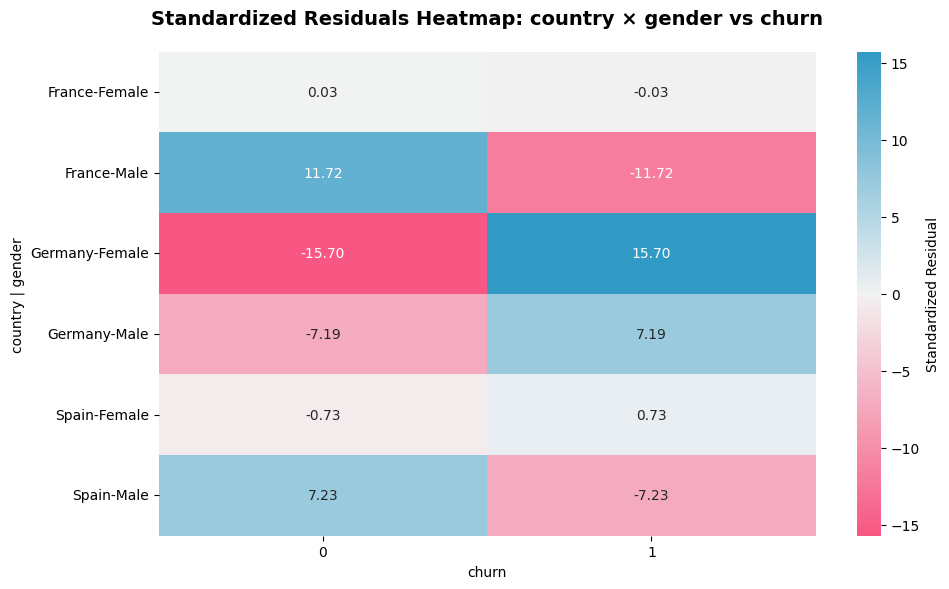

In [260]:
def chi2_residual_heatmap(df, row_feature1, row_feature2, col_feature, cmap=cmap):
    """
    Create Chi-square test + standardized residuals heatmap 
    for 2 categorical features vs a target categorical feature.

    Parameters:
        df (pd.DataFrame): input dataframe
        row_feature1 (str): first feature for row grouping (e.g., "country")
        row_feature2 (str): second feature for row grouping (e.g., "gender")
        col_feature (str): column feature (e.g., "churn")
        cmap (str): colormap for heatmap
    """

    # 1. Contingency table
    contingency = pd.crosstab(
        [df[row_feature1], df[row_feature2]],
        df[col_feature]
    )
    
    # 2. Chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency.values)
    expected_df = pd.DataFrame(
        expected, 
        index=contingency.index, 
        columns=contingency.columns
    )
    print(f"Chi2: {chi2:.4f} | dof: {dof} | p-value: {p:.6f}")
    
    # 3. Standardized residuals
    row_sums = contingency.sum(axis=1).values[:, None]   # R x 1
    col_sums = contingency.sum(axis=0).values[None, :]   # 1 x C
    grand_total = contingency.values.sum()
    
    row_prob = row_sums / grand_total
    col_prob = col_sums / grand_total
    
    denom = np.sqrt(expected * (1 - row_prob) * (1 - col_prob))
    std_resid = (contingency.values - expected) / denom
    
    std_resid_df = pd.DataFrame(
        std_resid, 
        index=contingency.index, 
        columns=contingency.columns
    )
    
    # 4. Heatmap
    plt.figure(figsize=(10,6))
    sns.heatmap(
        std_resid_df, annot=True, fmt=".2f", 
        cmap=cmap, center=0,
        cbar_kws={"label": "Standardized Residual"}
    )
    plt.title(
        f"Standardized Residuals Heatmap: {row_feature1} × {row_feature2} vs {col_feature}",
        weight="bold", fontsize=14, pad=20
    )
    plt.ylabel(f"{row_feature1} | {row_feature2}")
    plt.xlabel(col_feature)
    plt.tight_layout()
    plt.show()

chi2_residual_heatmap(
    df_customer_churnma, 
    row_feature1="country", 
    row_feature2="gender", 
    col_feature="churn"
)

Chi2: 353.0682 | dof: 3 | p-value: 0.000000


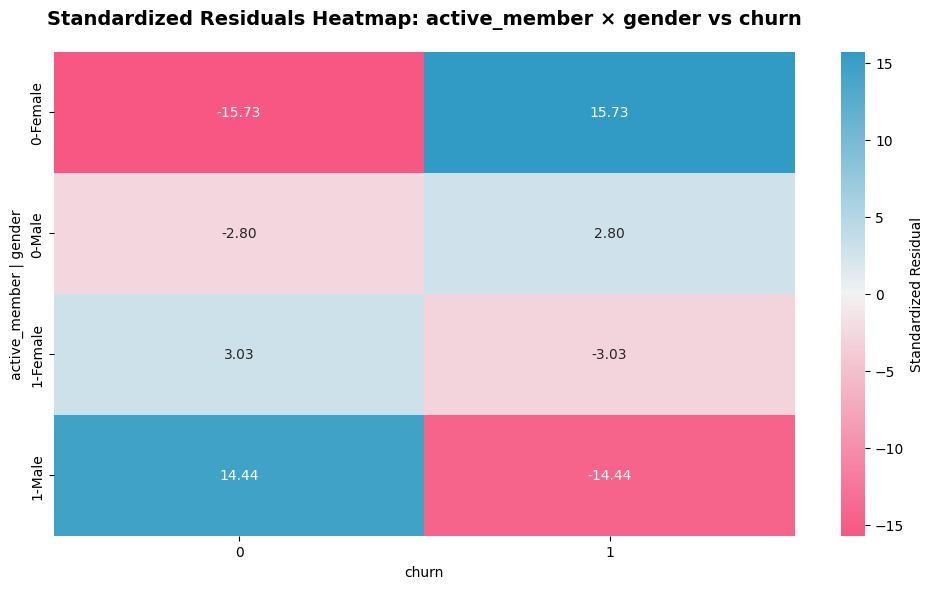

In [261]:
chi2_residual_heatmap(
    df_customer_churnma, 
    row_feature1="active_member", 
    row_feature2="gender", 
    col_feature="churn"
)

Chi2: 113.8751 | dof: 3 | p-value: 0.000000


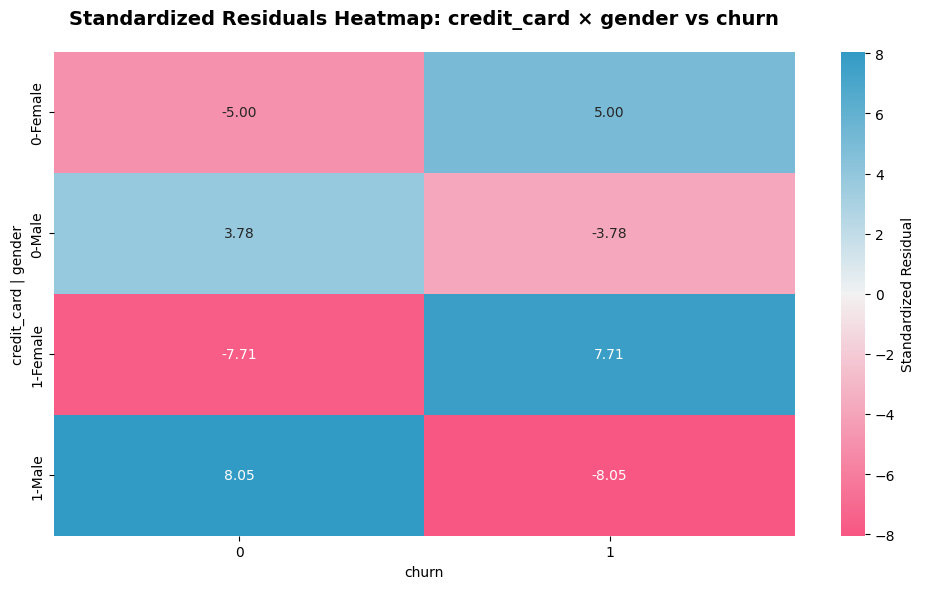

In [262]:
chi2_residual_heatmap(
    df_customer_churnma, 
    row_feature1="credit_card", 
    row_feature2="gender", 
    col_feature="churn"
)

Chi2: 1590.8192 | dof: 5 | p-value: 0.000000


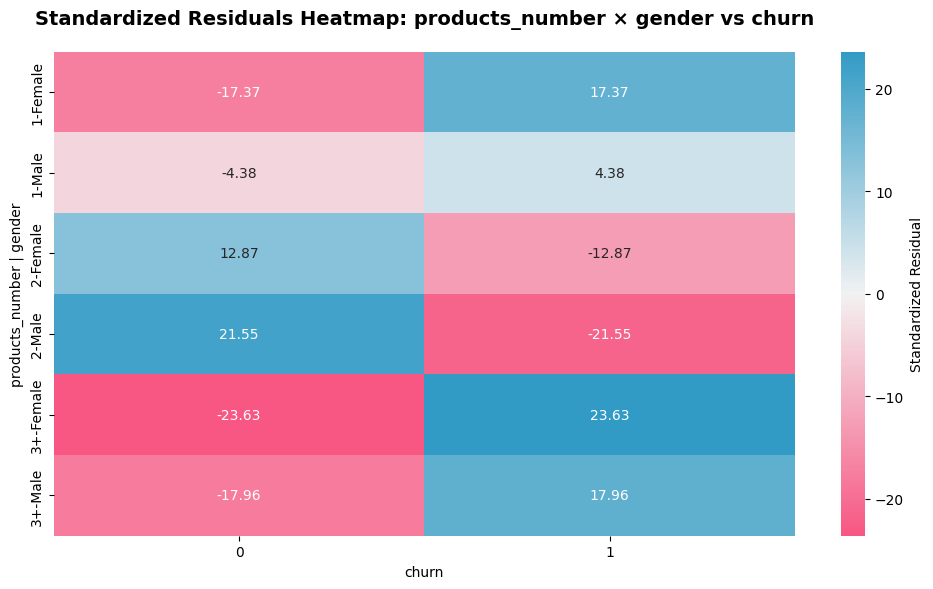

In [263]:
chi2_residual_heatmap(
    df_customer_churnma, 
    row_feature1="products_number", 
    row_feature2="gender", 
    col_feature="churn"
)

**Answer**

* **Average profiles (age, balance, credit score, salary) are very similar** between males and females → gender alone is not a direct driver.
* **Interactions with other factors** reveal the difference:

  * **Country**: German females churn significantly more than expected → key high-risk group.
  * **Activity status**: Inactive females are the **most likely to churn** across all groups.
  * **Products**: Females with **1 or 3+ products** show very high churn, unlike males.
  * **Credit card**: Females with a credit card churn slightly more, while males with a card churn less.
* 👉 Insight: **Higher female churn is explained by interactions with country, activity, and product usage**, not by demographics alone.

### Which customer segments deliver the highest value (balance, tenure, products), and how should retention resources be prioritized?

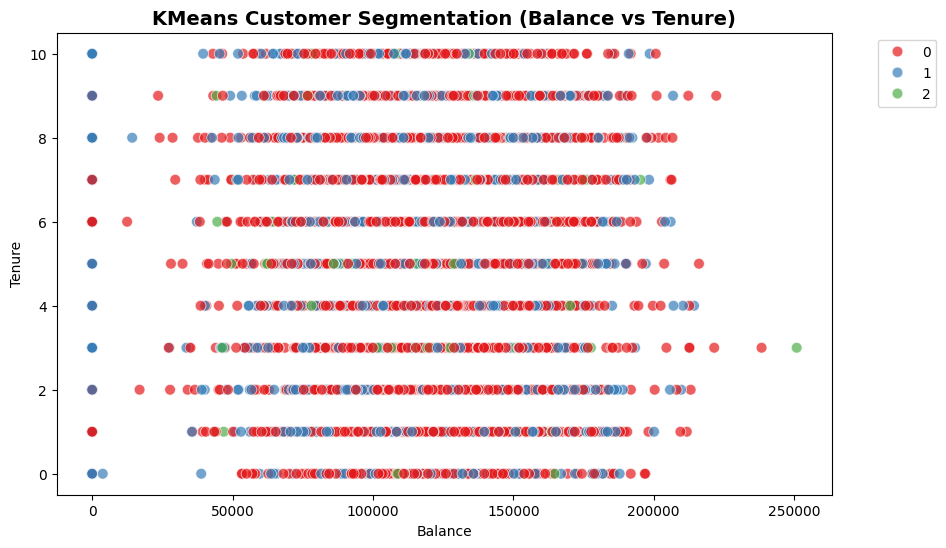

,Cluster,Avg_Balance,Avg_Tenure,Prod_1,Prod_2,Prod_3plus,ChurnRate,Count
0,0,98552.0,5.0,1.0,0.0,0.0,27.71,5084
1,1,51879.0,5.1,0.0,1.0,0.0,7.58,4590
2,2,78822.0,5.1,0.0,0.0,1.0,85.89,326


In [264]:
from sklearn.cluster import KMeans

def kmeans_customer_segmentation(df, n_clusters=3, random_state=42):
    df_seg = df.copy()

    # One-hot encode the categorical variable 'products_number'
    df_seg = pd.get_dummies(df_seg, columns=["products_number"], prefix="prod")

    # Select features for clustering
    features = ["balance", "tenure", "prod_1", "prod_2", "prod_3+"]
    X = df_seg[features]

    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Run KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state, n_init=10)
    df_seg["Cluster"] = kmeans.fit_predict(X_scaled)

    # Calculate average values and churn rate for each cluster
    summary = df_seg.groupby("Cluster").agg(
        Avg_Balance=("balance", "mean"),
        Avg_Tenure=("tenure", "mean"),
        Prod_1=("prod_1", "mean"),
        Prod_2=("prod_2", "mean"),
        Prod_3plus=("prod_3+", "mean"),
        ChurnRate=("churn", "mean"),
        Count=("churn", "count")
    ).reset_index()

    # Format summary
    summary["ChurnRate"] = (summary["ChurnRate"] * 100).round(2)
    summary["Avg_Balance"] = summary["Avg_Balance"].round(0)
    summary["Avg_Tenure"] = summary["Avg_Tenure"].round(1)

    # Visualization: Balance vs Tenure
    plt.figure(figsize=(10,6))
    sns.scatterplot(
        data=df_seg, 
        x="balance", y="tenure",
        hue="Cluster", palette="Set1",
        alpha=0.7, s=60
    )
    plt.title("KMeans Customer Segmentation (Balance vs Tenure)", fontsize=14, weight="bold")
    plt.xlabel("Balance")
    plt.ylabel("Tenure")
    plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
    plt.show()

    return df_seg, summary

# Apply segmentation
df_clustered, cluster_summary = kmeans_customer_segmentation(df_customer_churnma, n_clusters=3)
display(cluster_summary)

### Do older customers with high balances have different churn rates than younger customers? Can we build an “Older High-Balance” segment to focus on retention?

In [265]:
def age_grouping(age):
    if age < 30:
        return "Young (<30)"
    elif age <= 40:
        return "Early Career (30-40)"
    elif age <= 55:
        return "Middle Age (41-55)"
    else:
        return "Senior (55+)"
    
df_customer_churnma["age_group"] = df_customer_churnma["age"].apply(age_grouping)

# Phân tích churn theo age_group và balance
summary = df_customer_churnma.groupby("age_group").agg(
    Avg_Balance=("balance", "mean"),
    ChurnRate=("churn", "mean"),
    Count=("churn", "count")
).sort_values(by="Avg_Balance", ascending=False).reset_index()

summary["ChurnRate"] = (summary["ChurnRate"] * 100).round(2)
display(summary)

,age_group,Avg_Balance,ChurnRate,Count
0,Middle Age (41-55),79813.710938,38.01,2781
1,Senior (55+),78025.304688,36.75,800
2,Early Career (30-40),75248.453125,11.76,4778
3,Young (<30),73698.718750,7.56,1641


* **Older customers (41+) hold higher average balances (~78K) compared to younger groups (~73–75K).**
* However, they show **significantly higher churn rates** (36–38%) vs. younger groups (8–12%).
* 👉 This segment represents **high-value but high-risk customers**, making them a priority for **retention strategies** (personalized financial products, loyalty programs, proactive engagement).

### Does churn rate consistently decrease as CreditScore increases?

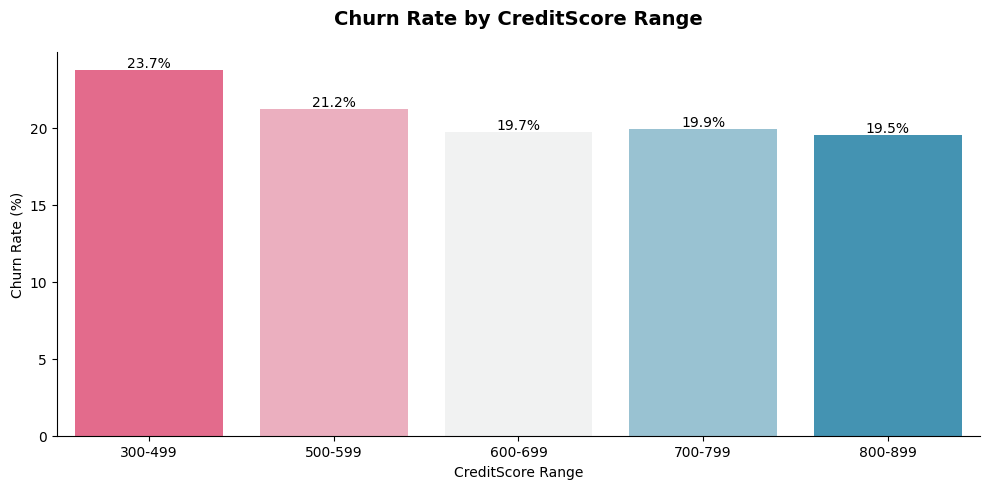

In [266]:
# Divide CreditScore into ranges (bins)
bins = [300, 500, 600, 700, 800, 900]
labels = ["300-499", "500-599", "600-699", "700-799", "800-899"]
df_customer_churnma["CS_group"] = pd.cut(df_customer_churnma["credit_score"], bins=bins, labels=labels, right=False)

# Calculate churn rate for each group
churn_by_group = df_customer_churnma.groupby("CS_group")["churn"].mean().reset_index()
churn_by_group["churn"] *= 100  # convert to percentage

# Plot barplot
plt.figure(figsize=(10,5))
sns.barplot(data=churn_by_group, x="CS_group", y="churn",palette=color(n_colors=5))
sns.despine()
plt.title("Churn Rate by CreditScore Range", weight="bold", fontsize=14, pad=20)
plt.ylabel("Churn Rate (%)")
plt.xlabel("CreditScore Range")

# Display percentage values
for i, v in enumerate(churn_by_group["churn"]):
    plt.text(i, v, f"{v:.1f}%", ha="center", va="bottom")

plt.tight_layout()
plt.show()

* The first two ranges (**300–499** and **500–599**) have similar churn rates (\~22.8–22.9%).
* There is a small drop for **600–699** (\~20.7%) and **700–799** (\~20.2%), but it slightly increases again for **800–899** (\~20.3%). <br>
* 👉 **Churn rate does not consistently decrease** as CreditScore increases.

### Is churn rate linearly related to Age, or is it higher only in certain age groups?

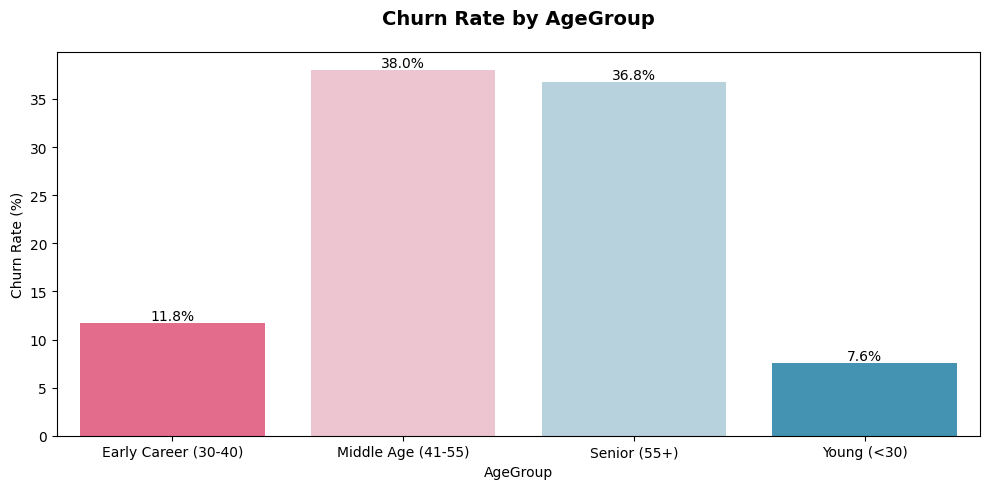

In [267]:
# Calculate churn rate for each group
churn_by_group = df_customer_churnma.groupby("age_group")["churn"].mean().reset_index()
churn_by_group["churn"] *= 100  # convert to percentage

# Plot barplot
plt.figure(figsize=(10,5))
sns.barplot(data=churn_by_group, x="age_group", y="churn",palette=color(n_colors=4))
plt.title("Churn Rate by AgeGroup", weight="bold", fontsize=14, pad=20)
plt.ylabel("Churn Rate (%)")
plt.xlabel("AgeGroup")

# Display percentage values
for i, v in enumerate(churn_by_group["churn"]):
    plt.text(i, v, f"{v:.1f}%", ha="center", va="bottom")

plt.tight_layout()
plt.show()

* Older customers = **high churn risk → focus retention strategies** (loyalty programs, retirement-oriented products).
* Younger customers = **low churn → prioritize cross-sell & upsell** to maximize lifetime value.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Preprocessing</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #2e7d32; 
    padding: 20px; 
    background: linear-gradient(125deg, #1b5e20 5%, #43a047 40%, #81c784 75%, #c8e6c9 100%);
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #fff; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 10px; 
        font-size: 36px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Data Preprocessing
    </h1>
</div>

## Feature Engineering

In [269]:
# Credit Utilization
df_customer_churn["credit_utilization"] = df_customer_churn["balance"] / df_customer_churn["estimated_salary"]

# CreditScore per Age
df_customer_churn["credit_score_per_age"] = df_customer_churn["credit_score"] / df_customer_churn["age"]

# HighBalance_Inactive
bal_median_train = df_customer_churn["balance"].median()
df_customer_churn["high_balance_inactive"] = ((df_customer_churn["balance"] >= bal_median_train) &\
                                               (df_customer_churn["active_member"] == 0)).astype(int)

,churn,Count,Mean,Median,Std
1,1,2037,9.352977,0.887100,238.215759
0,0,7963,2.478339,0.703392,14.803568


🔎 D’Agostino and Pearson Normality Test for 'credit_utilization' across 'churn' groups

 Group: 1 (n = 2037)
  Statistic : 6183.044
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 0 (n = 7963)
  Statistic : 17721.813
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'credit_utilization' by 'churn'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 9289838.0
p-value     : 2.6504703243809545e-25

✅ Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: Group '1' has a higher median 'credit_utilization' than Group '0'.


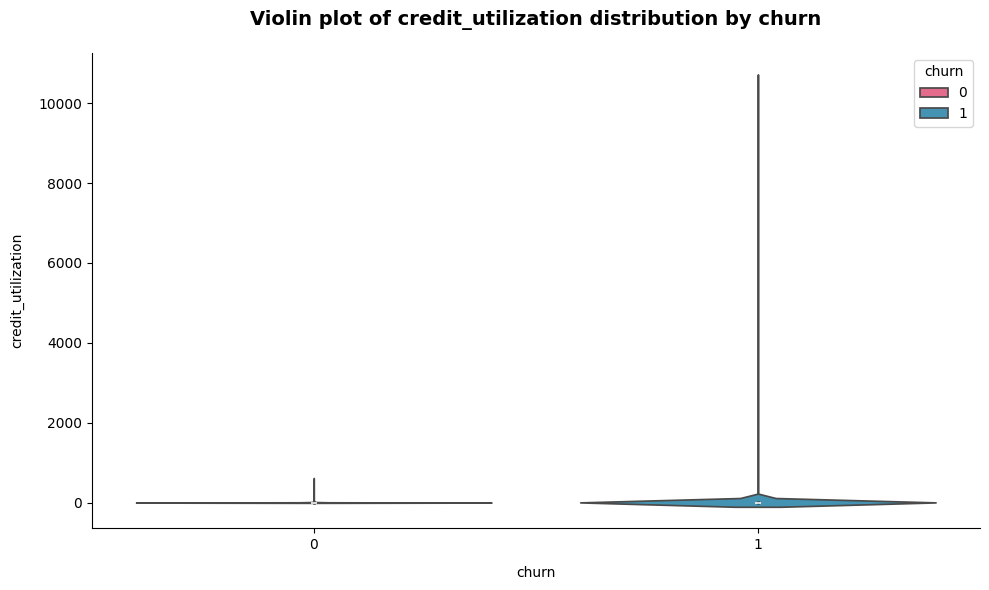

,churn,Count,Mean,Median,Std
0,0,7963,18.563458,18.000000,5.360488
1,1,2037,15.180454,14.466667,4.524170


🔎 D’Agostino and Pearson Normality Test for 'credit_score_per_age' across 'churn' groups

 Group: 1 (n = 2037)
  Statistic : 433.732
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 0 (n = 7963)
  Statistic : 695.335
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'credit_score_per_age' by 'churn'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 4866734.0
p-value     : 2.8892550625434487e-171

✅ Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: Group '0' has a higher median 'credit_score_per_age' than Group '1'.


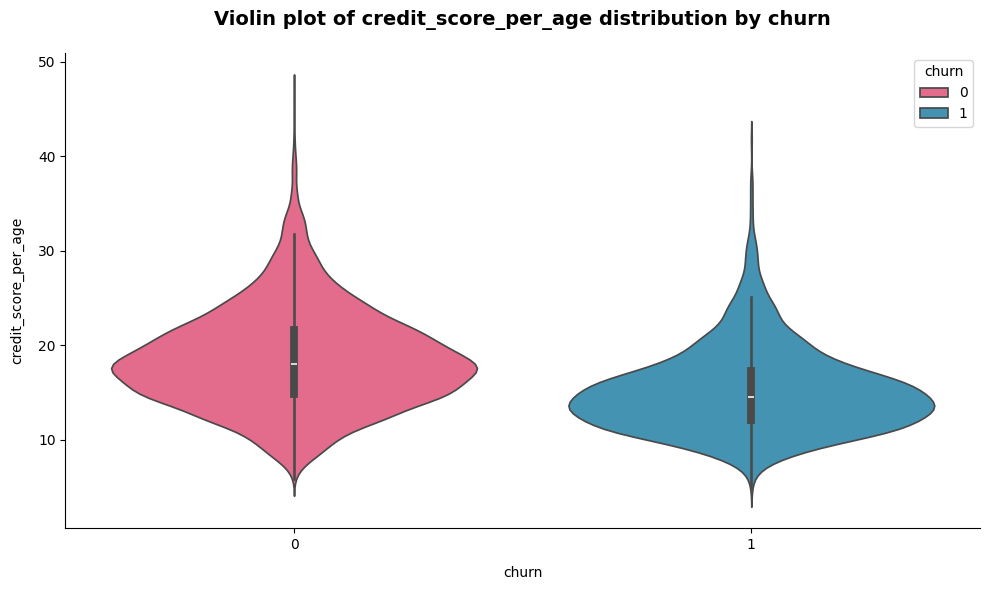

In [270]:
new_features = ["credit_utilization", "credit_score_per_age"]
for feature in new_features:
    plot_numerical_distribution_by_Exited(feature=feature)

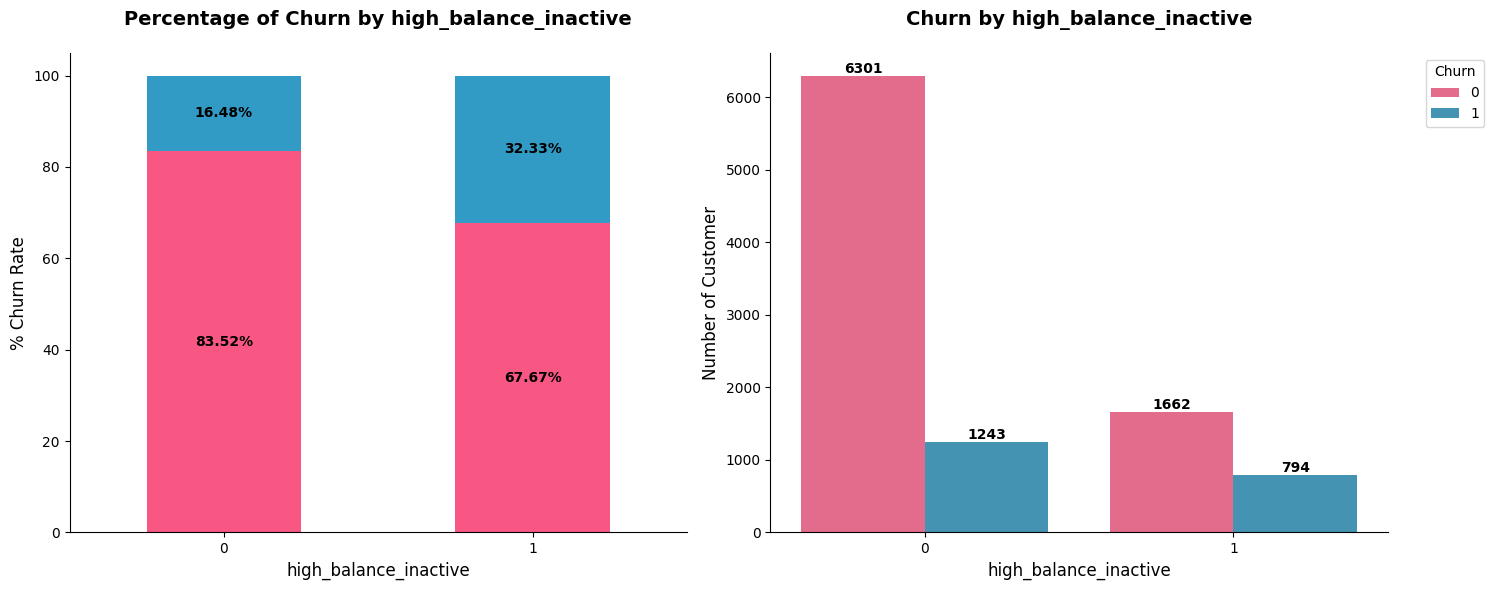


🔍 Chi-Square Test of Independence: 'high_balance_inactive' vs. 'churn'
Chi-squared statistic: 286.067198896648
Degrees of freedom: 1
p-value: 3.576827132926739e-64
✅ Result: p-value < 0.05 → Reject H₀
→ There is a **statistically significant association** between 'high_balance_inactive' and 'churn'.

📈 Standardized Residuals:
churn                     0      1
high_balance_inactive             
0                      3.79  -7.49
1                     -6.64  13.13


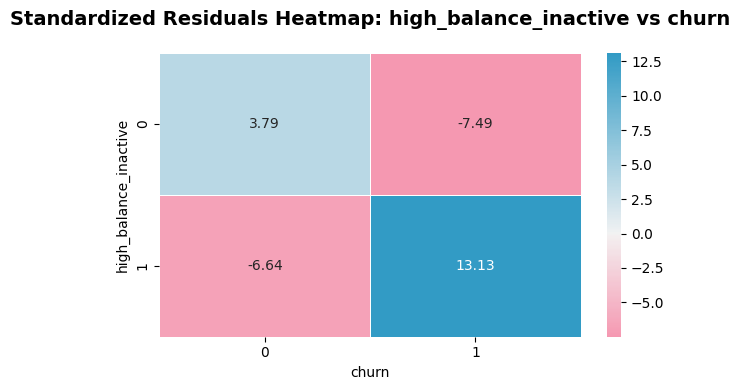

In [271]:
bivariate_percent_plot(cat="high_balance_inactive", df=df_customer_churn)

**Credit Utilization**

* Churn group shows **much higher utilization** (median 0.689 vs 0).
  👉 **High Credit Utilization = higher churn risk**.

**CreditScorePerAge**

* Retained customers have **higher CreditScorePerAge** than churned ones.
  👉 **Low CreditScorePerAge = churn signal**.

**HighBalance × Inactive**

* Customers with **high balances but inactive status** churn at a **much higher rate** than expected.
  👉 This is a **high-risk segment requiring tailored retention strategies**.

### Overall Picture

| Feature                   | Type        | Statistical Test Used | Relationship with Exited | Summary                                                                                                 |
| ------------------------- | ----------- | --------------------- | ------------------------ | ------------------------------------------------------------------------------------------------------- |
| **country**               | Categorical | Chi-Square Test       | Significant              | Customers from **Germany** are more likely to churn, **France** and **Spain** less likely to churn.     |
| **gender**                | Categorical | Chi-Square Test       | Significant              | **Female** customers have a higher churn rate than males.                                               |
| **credit_card**           | Categorical | Chi-Square Test       | Significant              | Customers **without a credit card** churn more than expected, those **with** churn less.                |
| **active_member**         | Categorical | Chi-Square Test       | Significant              | **Inactive** customers are more likely to churn.                                                        |
| **products_number**       | Categorical | Chi-Square Test       | Significant              | Customers with **1, 3+** have higher-than-expected churn.                                               |
| **high_balance_inactive** | Categorical | Chi-Square Test       | Significant              | Customers with **high account balances but inactive status** churn at a much higher rate than expected. |
| **credit_score**          | Numerical   | Mann–Whitney U Test   | Significant              | Non-churned customers have slightly **higher median credit scores** (653 vs. 646).                      |
| **credit_utilization**    | Numerical   | Mann–Whitney U Test   | Significant              | Churned customers have a **higher median credit utilization** (0.689 vs. 0).                            |
| **credit_score_per_age**  | Numerical   | Mann–Whitney U Test   | Significant              | Non-churned customers have a **higher median CreditScorePerAge** than churned customers.                |
| **age**                   | Numerical   | Mann–Whitney U Test   | Significant              | Churned customers tend to be **older** (median 45 vs. 36).                                              |
| **balance**               | Numerical   | Mann–Whitney U Test   | Significant              | Churned customers have a **notably higher median balance** (109,344 vs. 92,063).                        |
| **tenure**                | Numerical   | Mann–Whitney U Test   | Significant              | The distribution of Tenure between the two groups **differs significantly** in a statistical sense.     |
| **estimated_salary**      | Numerical   | Mann–Whitney U Test   | Significant              | The churn group has a **higher median estimated salary**.                                               |

## Handling Skewness

In [276]:
num_features = ["credit_score", "age", "tenure", "balance", "estimated_salary", 
                "credit_utilization", "credit_score_per_age"]
skew_feature, skew_df = check_skewness(data=df_customer_churn,
                                                   numerical_features=num_features)


🔍 Skewness for dataset:
----------------------------------------------------------------------
Feature                        | Skewness   | Remark
----------------------------------------------------------------------
credit_utilization             | +94.264015 | Highly skewed
age                            |  +1.011320 | Highly skewed
credit_score_per_age           |  +0.760517 | Moderately skewed
balance                        |  -0.141109 | Approximately symmetric
credit_score                   |  -0.071607 | Approximately symmetric
tenure                         |  +0.010991 | Approximately symmetric
estimated_salary               |  +0.002085 | Approximately symmetric
----------------------------------------------------------------------


In [275]:
from sklearn.preprocessing import PowerTransformer

def handle_skewed_features(
    df,
    zero_threshold=0.9,
    skew_threshold=0.5,
    num_features=None,
    exclude_cols=None
    
):
    """
    Handle skewed numerical features by applying appropriate transformations,
    *forcing* certain columns to be transformed even if they don't exceed skew_threshold.

    Parameters:
    - df: pandas.DataFrame
    - zero_threshold: float (default=0.9)
    - skew_threshold: float (default=0.5)
    - num_features: list of numerical columns to consider
    - exclude_cols: list of columns to skip entirely
    - dataset: Name of dataset

    Returns:
    - df: transformed DataFrame
    - transformed_cols: list of new feature names
    - high_zero_cols: list of sparse features (> zero_threshold)
    - skewed_cols: list of auto‑detected skewed features
    - pt_dict: dict mapping each YJ‑transformed col → its PowerTransformer
    """
    df = df.copy()
    if num_features is None:
        raise ValueError("`num_features` must be provided")
    if exclude_cols is None:
        exclude_cols = []

    # 1) pick the numeric cols to scan
    numerical_cols = [c for c in num_features if c not in exclude_cols]

    # 2) detect ultra‑sparse
    zero_ratios = (df[numerical_cols] == 0).sum() / len(df)
    high_zero_cols = zero_ratios[zero_ratios > zero_threshold].index.tolist()
    
    # 3) compute skew
    skew_vals = df[numerical_cols].apply(lambda s: skew(s.dropna()))
    auto_skewed = skew_vals[abs(skew_vals) > skew_threshold].index.tolist()

    # 4) union these with your forced list
    to_transform = list(set(auto_skewed))

    transformed_cols = []
    dropped_cols     = []

    for col in to_transform:
        # if it's sparse → binary+log
        if col in high_zero_cols:
            df[f"Has_{col}"] = (df[col] > 0).astype(int)
            df[f"Log_{col}"] = df[col].map(lambda x: np.log1p(x) if x > 0 else 0)
            transformed_cols += [f"Has_{col}", f"Log_{col}"]
            dropped_cols.append(col)
        # if it's discrete small‑cardinality, skip transform but keep
        elif df[col].nunique() <= 5:
            # do nothing (we still keep raw col in df)
            print("AAA")
            continue
        # otherwise apply Yeo‑Johnson
        else:
            pt = PowerTransformer(method="yeo-johnson")
            arr = df[[col]].values  # shape (n,1)
            df[f"PT_{col}"] = pt.fit_transform(arr)
            transformed_cols.append(f"PT_{col}")
            dropped_cols.append(col)

    # drop originals for any column we did transform
    df.drop(columns=dropped_cols, inplace=True)

    return df, transformed_cols, high_zero_cols, auto_skewed

In [279]:
processed_df, transformed_columns, sparse_columns, skewed_columns = handle_skewed_features(df=df_customer_churn, num_features=skew_feature)
num_features = ["credit_score", "PT_age", "tenure", "balance", "estimated_salary", 
                "PT_credit_utilization", "PT_credit_score_per_age"]
skew_feature_train, skew_train_df = check_skewness(data=processed_df, numerical_features=num_features)


🔍 Skewness for dataset:
----------------------------------------------------------------------
Feature                        | Skewness   | Remark
----------------------------------------------------------------------
PT_credit_utilization          |  +0.231635 | Approximately symmetric
balance                        |  -0.141109 | Approximately symmetric
credit_score                   |  -0.071607 | Approximately symmetric
tenure                         |  +0.010991 | Approximately symmetric
PT_age                         |  -0.002495 | Approximately symmetric
estimated_salary               |  +0.002085 | Approximately symmetric
PT_credit_score_per_age        |  +0.000025 | Approximately symmetric
----------------------------------------------------------------------


**Insight** <br>
**Observations from the Skewness Table (`processed_df`):**

✅ **Approximately Symmetric**: <br>
Several features, such as: <br>
  * `PT_Age` and `PT_credit_score_per_age` show skewness close to `0`.
  * PT_credit_utilization show value skew `+0.23` (Approximately symmetric).
  * This indicates that **Yeo-Johnson transformation was effective** for these variable.

## Re-check Outlier

In [280]:
checking_outlier(list_feature=num_features, df=processed_df, dataset_name="Data")

🔍 Data Checking outlier


,Feature,Outlier Count
0,credit_score,15
1,PT_age,143
2,PT_credit_score_per_age,75


## Create Test Set

Suppose we chatted with experts who told us that the **estimated_salary** is a very important attribute to predict **churn**. We may want to ensure that the test set is representative of the various categories of **estimated_salary** in the whole dataset. Since the **estimated_salary** is a continuous numerical attribute, we first need to create an category attribute.

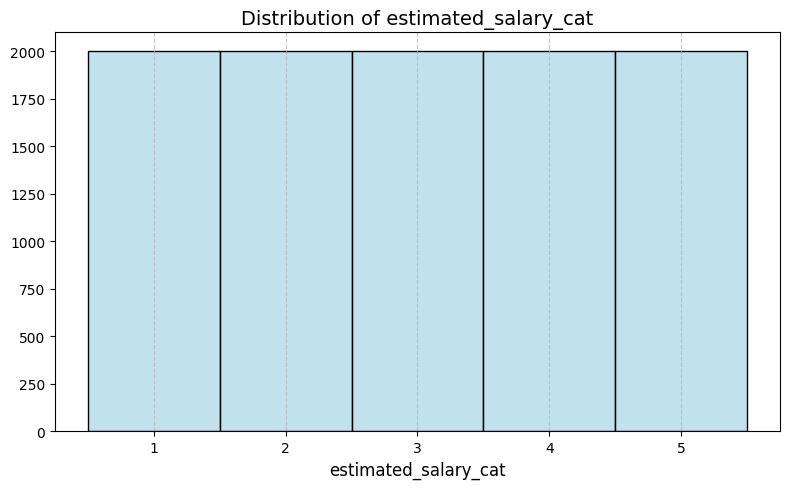

In [282]:
processed_df["estimated_salary_cat"] = pd.qcut(processed_df["estimated_salary"],
                                              q=5,
                                              labels=[1, 2, 3, 4, 5])

plt.figure(figsize=(8, 5))
sns.histplot(data=processed_df, x="estimated_salary_cat", color="lightblue", edgecolor="black")

plt.title("Distribution of estimated_salary_cat", fontsize=14)
plt.xlabel("estimated_salary_cat", fontsize=12)
plt.ylabel("")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [285]:
split = StratifiedShuffleSplit(n_splits=config.n_split, test_size=config.test_size, random_state=config.random_state)
for train_index, val_index in split.split(processed_df, processed_df["estimated_salary_cat"]):
    start_train_set = processed_df.iloc[train_index]
    start_val_set = processed_df.iloc[val_index]

## Scale and Ecode

In [286]:
# Now we should remove the estimated_salary_cat attribute so the data is back to its original state:
for set_ in (start_train_set, start_val_set): 
    set_.drop("estimated_salary_cat", axis=1, inplace=True)

In [287]:
df_churn_new = start_train_set.drop("churn", axis=1)
df_churn_label = start_train_set["churn"].copy()

In [292]:
# There are no **missing values** in dataset. But we will still handle missing values ​​to check the data in the future.
cat_onehot_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")), 
    ("encoder", OneHotEncoder(handle_unknown="ignore")) # Handling Text and Categorical Attributes
])

num_robust_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", RobustScaler())
])

num_stand_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

list_feature_num_robust = ["credit_score", "PT_age", "PT_credit_score_per_age"]
list_feature_num_stand = ["tenure", "balance", "estimated_salary", "PT_credit_utilization"]
list_feature_cat_onehot= ["country", "gender", "products_number", "credit_card", "active_member",
                          "high_balance_inactive"]

preprocessor = ColumnTransformer(transformers=[
    ("num_robust", num_robust_transformer, list_feature_num_robust),
    ("num_standard", num_stand_transformer, list_feature_num_stand),
    ("cat_onehot", cat_onehot_transformer, list_feature_cat_onehot),
])

preprocessor.fit(df_churn_new)
df_churn_prepared = preprocessor.transform(df_churn_new)
list_feature_prepared = preprocessor.get_feature_names_out().tolist()
list_feature_prepared

['num_robust__credit_score',
 'num_robust__PT_age',
 'num_robust__PT_credit_score_per_age',
 'num_standard__tenure',
 'num_standard__balance',
 'num_standard__estimated_salary',
 'num_standard__PT_credit_utilization',
 'cat_onehot__country_France',
 'cat_onehot__country_Germany',
 'cat_onehot__country_Spain',
 'cat_onehot__gender_Female',
 'cat_onehot__gender_Male',
 'cat_onehot__products_number_1',
 'cat_onehot__products_number_2',
 'cat_onehot__products_number_3+',
 'cat_onehot__credit_card_0',
 'cat_onehot__credit_card_1',
 'cat_onehot__active_member_0',
 'cat_onehot__active_member_1',
 'cat_onehot__high_balance_inactive_0',
 'cat_onehot__high_balance_inactive_1']

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Define Metric</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #2e7d32; 
    padding: 20px; 
    background: linear-gradient(125deg, #1b5e20 5%, #43a047 40%, #81c784 75%, #c8e6c9 100%);
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #fff; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 10px; 
        font-size: 36px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Define Metric
    </h1>
</div>

| Metric        | Definition                                                  | Meaning in Attrition Context                                          |
| ------------- | ----------------------------------------------------------- | --------------------------------------------------------------------- |
| **Recall**    | $\frac{TP}{TP + FN}$                                        | **Most important** – how many true leavers you can catch              |
| **Precision** | $\frac{TP}{TP + FP}$                                        | Among predicted leavers, how many are actually correct                |
| **Accuracy**  | $\frac{TP + TN}{Total}$                                     | Can be misleading with imbalanced data (e.g., <20% attrition)         |
| **F1-score**  | $\frac{2 \cdot Precision \cdot Recall}{Precision + Recall}$ | Balanced trade-off between Precision and Recall                       |
| **AUC-ROC**   | Area under ROC Curve                                        | Measures ability to distinguish leavers vs. stayers at all thresholds |

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Comparison Models</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #2e7d32; 
    padding: 20px; 
    background: linear-gradient(125deg, #1b5e20 5%, #43a047 40%, #81c784 75%, #c8e6c9 100%);
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #fff; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 10px; 
        font-size: 36px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Comparison Models
    </h1>
</div>

In [293]:
# Using SMOTE to handling imbalance data.
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=config.random_state)
X_resampled, y_resampled = smote.fit_resample(df_churn_prepared, df_churn_label)

In [296]:
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier, 
                              ExtraTreesClassifier, AdaBoostClassifier, BaggingClassifier, HistGradientBoostingClassifier)
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=config.random_state)
models = [
    LinearSVC(random_state=config.random_state),
    SVC(random_state=config.random_state),
    KNeighborsClassifier(),
    GaussianNB(),
    LogisticRegression(random_state=config.random_state),
    DecisionTreeClassifier(random_state=config.random_state),
    RandomForestClassifier(random_state=config.random_state),
    ExtraTreesClassifier(random_state=config.random_state),
    AdaBoostClassifier(random_state=config.random_state),
    XGBClassifier(random_state=config.random_state),
    MLPClassifier(random_state=config.random_state),
    GradientBoostingClassifier(random_state=config.random_state),
    RidgeClassifier(random_state=config.random_state),
    CatBoostClassifier(verbose=0, random_seed=config.random_state),
    BaggingClassifier(random_state=config.random_state),
    LGBMClassifier(random_state=config.random_state, verbosity=-1),
    HistGradientBoostingClassifier(random_state=config.random_state)
]

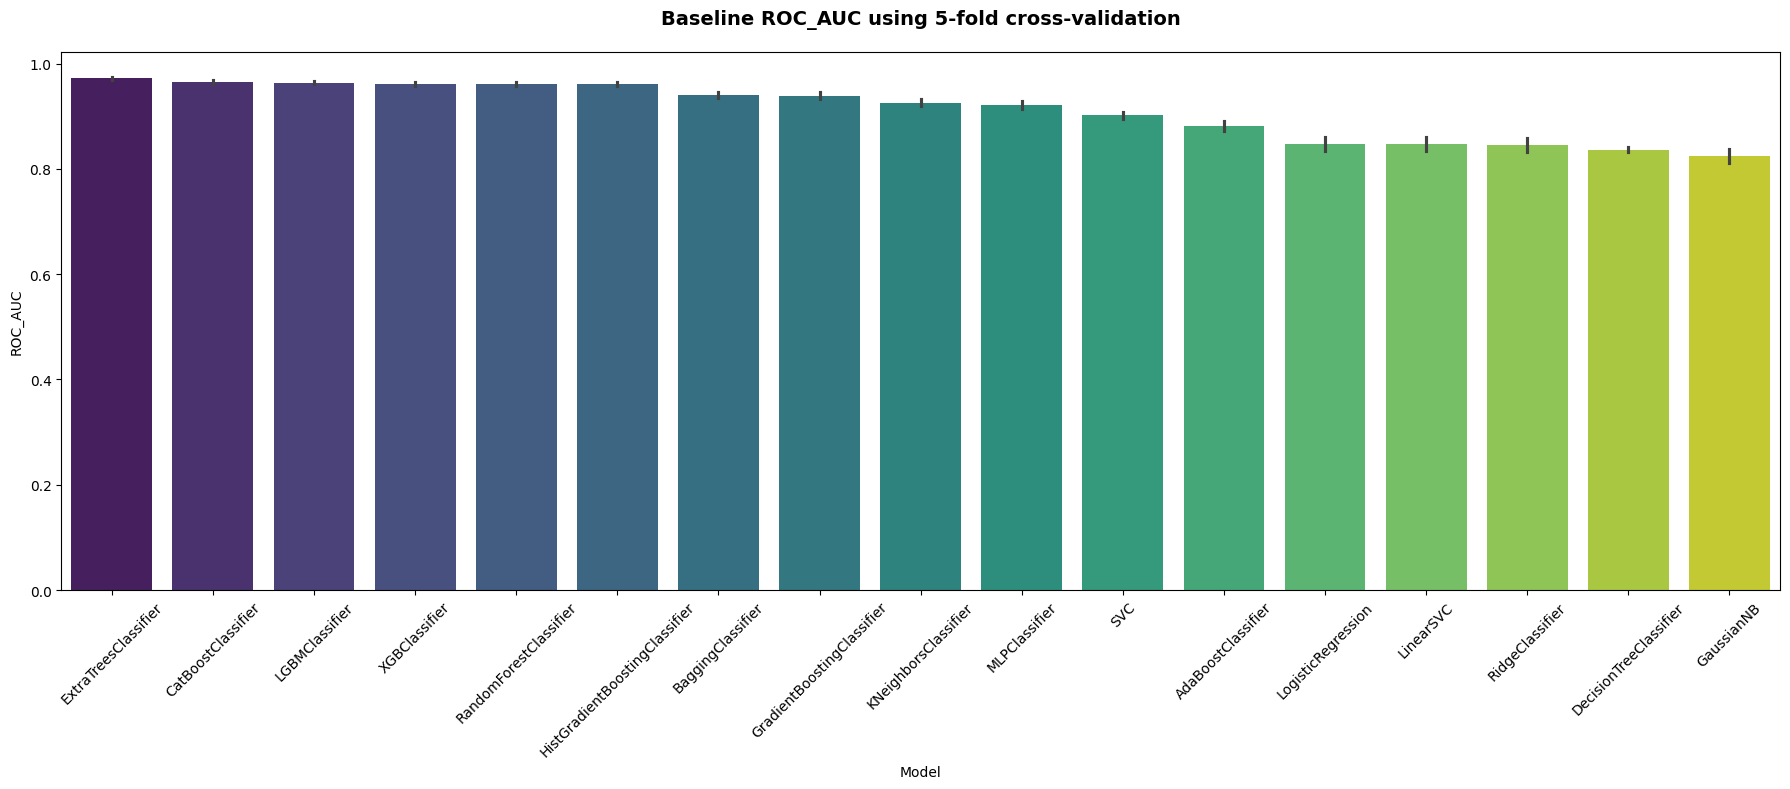

,Mean,Std,N
model_name,,,
ExtraTreesClassifier,0.971691,0.002015,5
CatBoostClassifier,0.965489,0.003421,5
LGBMClassifier,0.963942,0.002988,5
XGBClassifier,0.961857,0.003750,5
RandomForestClassifier,0.961745,0.003755,5
HistGradientBoostingClassifier,0.961395,0.003726,5
BaggingClassifier,0.940706,0.005258,5
GradientBoostingClassifier,0.939350,0.007465,5
KNeighborsClassifier,0.925332,0.006681,5


In [297]:
def generate_baseline_results(models=models, X=X_resampled, y=y_resampled,
                              metric="roc_auc", cv=kfold, plot_result=False):
    entries = []
    for model in models:
        model_name = getattr(model, "name", model.__class__.__name__)
        scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
        for fold_idx, s in enumerate(scores, start=1):
            entries.append((model_name, fold_idx, s))

    cv_df = pd.DataFrame(entries, columns=["model_name", "fold_id", "score"])

    summary = (cv_df.groupby("model_name")["score"]
                    .agg(Mean="mean", Std="std", N="size")
                    .sort_values("Mean", ascending=False))

    if plot_result:
        order = summary.index.tolist()
        plt.figure(figsize=(18, 8))
        sns.barplot(data=cv_df, x="model_name", y="score", order=order, errorbar=("sd"), palette="viridis")
        title_metric = metric.upper() if isinstance(metric, str) else "Score"
        nfolds = getattr(cv, "n_splits", "CV")
        plt.title(f"Baseline {title_metric} using {nfolds}-fold cross-validation", fontsize=14, weight="bold", pad=20)
        plt.xlabel("Model"); plt.ylabel(title_metric)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    return summary

display(generate_baseline_results(plot_result = True))

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Hyperparameter tuning</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #2e7d32; 
    padding: 20px; 
    background: linear-gradient(125deg, #1b5e20 5%, #43a047 40%, #81c784 75%, #c8e6c9 100%);
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #fff; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 10px; 
        font-size: 36px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Hyperparameter tuning
    </h1>
</div>

In [298]:
def shap_plot(model, X_test, list_feature, type = None):
     # https://towardsdatascience.com/using-shap-values-to-explain-how-your-machine-learning-model-works-732b3f40e137/
    if hasattr(X_test, "toarray"):
        X_test = X_test.toarray()
    X_test_sample = pd.DataFrame(X_test, columns=list_feature)
    explainer = shap.Explainer(model.predict, X_test_sample)
    shap_values = explainer(X_test_sample)
    if type =="bar":
        shap_importance = np.abs(shap_values.values).mean(axis=0)
        shap_df = pd.DataFrame({"feature": X_test_sample.columns, "importance": shap_importance})
        shap_df = shap_df.sort_values("importance", ascending=False).head(20)
        plt.figure(figsize=(12, 6))
        sns.barplot(x=shap_df["importance"], y=shap_df["feature"], palette="viridis", order=shap_df["feature"])
        plt.xlabel("mean(|SHAP value|)")
        plt.title("SHAP Feature Importance", fontsize=14, weight="bold", pad=20)
        plt.tight_layout()
        plt.show()
    else:
        shap.summary_plot(shap_values, X_test_sample)

In [337]:
def plot_ROC_confusionMatrix(estimator, X_val, y_val, figsize):
    y_pred_prob = estimator.predict_proba(X_val)[:, 1]  # Probability of positive class
    y_pred = estimator.predict(X_val)

    fig, ax = plt.subplots(nrows=2, ncols=2, sharey=False, figsize=figsize)

    # Plot 1
    # Calculate ROC
    fpr, tpr, _ = roc_curve(y_val, y_pred_prob)
    rocScore = roc_auc_score(y_val, y_pred_prob)

    ax[0, 0].plot(fpr, tpr, label=f"{estimator.__class__.__name__} (AUC = {rocScore:.2f})")
    ax[0, 0].plot([0, 1], [0, 1], "b--")
    ax[0, 0].set_xlabel("False Positive Rate")
    ax[0, 0].set_ylabel("True Positive Rate")
    ax[0, 0].set_title(f"ROC ({estimator.__class__.__name__})", fontsize=14, weight="bold", pad=20)
    ax[0, 0].legend()

    # Plot 2
    confusionMatrix = confusion_matrix(y_val, y_pred)
    sns.heatmap(confusionMatrix, annot=True, fmt="d", cmap="Blues", ax=ax[0, 1])
    ax[0, 1].set_title(f"Confusion Matrix ({estimator.__class__.__name__})", fontsize=14, weight="bold", pad=20)
    ax[0, 1].set_xlabel("Prediction")
    ax[0, 1].set_ylabel("Actual")

    # plot 3
    avg_prec = average_precision_score(y_val, y_pred_prob)   
    precision, recall, thresholds_pr = precision_recall_curve(y_val, y_pred_prob)
    ax[1, 0].plot(recall, precision, label=f"PR Curve (AP = {avg_prec:.3f})")
    ax[1, 0].set_xlabel("Recall")
    ax[1, 0].set_ylabel("Precision")
    ax[1, 0].set_title("Precision-Recall Curve", fontsize=14, weight="bold", pad=20)
    ax[1, 0].legend()

    ax.flat[-1].set_visible(False)

    plt.tight_layout()
    plt.show()

    print(classification_report(y_val, y_pred))

In [338]:
# Function to evaluate models
def evaluate_model(model, X_train, X_val, y_train, y_val, figsize = (15, 6), show_shap_plot = False):
    print(f"Evaluating {model.__class__.__name__}...")
    model.fit(X_train, y_train)
    plot_ROC_confusionMatrix(estimator = model, X_val = X_val, y_val = y_val, figsize = figsize)
    if show_shap_plot:
        shap_sample = X_val.iloc[:200] if isinstance(X_val, pd.DataFrame) else X_val[:200]
        shap_plot(model=model, X_test=shap_sample, list_feature=list_feature_prepared)

In [301]:
X_val = start_val_set.drop("churn", axis=1)
y_val = start_val_set["churn"].copy()
X_val_prepared = preprocessor.transform(X_val)

## ExtraTreesClassifier

In [319]:
param_etc = {
"n_estimators": 159, 
"max_depth": 29, 
"min_samples_split": 2, 
"min_samples_leaf": 1, 
"max_features": "sqrt", 
"bootstrap": False,
"random_state": config.random_state,
"n_jobs": -1
}

model_etc = ExtraTreesClassifier(**param_etc)
model_etc

,n_estimators,159
,criterion,'gini'
,max_depth,29
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,False
,oob_score,False


## CatBoostClassifier

In [320]:
param_cb = {
"bootstrap_type": "MVS", 
"iterations": 978, 
"depth": 10, 
"learning_rate": 0.03122420823440868, 
"l2_leaf_reg": 0.004829492691644722, 
"border_count": 237, 
"random_strength": 1.9230816620534632,
"verbose": False,
"random_seed": config.random_state,
"loss_function": "Logloss",
"allow_writing_files": False,
"eval_metric": "AUC",
"task_type": "CPU",
"thread_count": -1
}

model_cb = CatBoostClassifier(**param_cb)
model_cb

## LGBMClassifier

In [321]:
param_lgbm = {
'n_estimators': 866, 
'learning_rate': 0.05448086602735176, 
'num_leaves': 257, 
'max_depth': 15,
'min_child_samples': 10, 
'subsample': 0.6232250344588636, 
'colsample_bytree': 0.9240572875145135, 
'reg_alpha': 0.1447506487412784, 
'reg_lambda': 0.027139899423072752,
"objective": "binary",
"metric": "AUC",
"random_state": config.random_state,
"n_jobs": -1,
"verbosity": -1
}
model_lgbm = LGBMClassifier(**param_lgbm)
model_lgbm

,boosting_type,'gbdt'
,num_leaves,257
,max_depth,15
,learning_rate,0.05448086602735176
,n_estimators,866
,subsample_for_bin,200000
,objective,'binary'
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,10


## XGBClassifier

In [322]:
param_xgb = {
"n_estimators": 712, 
"max_depth": 12, 
"learning_rate": 0.029623958272268894, 
"subsample": 0.8890269334455189, 
"colsample_bytree": 0.6220129572733032,
"gamma": 0.732343896024784, 
"min_child_weight": 5, 
"reg_alpha": 0.0028798910143358575, 
"reg_lambda": 0.1524015608993211,
"random_state": config.random_state,
"n_jobs": -1,
"use_label_encoder": False,
"eval_metric": "auc",        # để consistent với mục tiêu tối ưu
"tree_method": "gpu_hist",   # GPU support
"predictor": "gpu_predictor", # GPU inference
"objective": "binary:logistic",
"eval_metric": "auc"
 }

model_xgb = XGBClassifier(**param_xgb)
model_xgb

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.6220129572733032
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'auc'


## RandomForestClassifier

In [323]:
param_rf = {
"n_estimators": 526, 
"max_depth": 28, 
"min_samples_split": 2, 
"min_samples_leaf": 1,
"max_features": "log2", 
"bootstrap": False,
"random_state": config.random_state,
"n_jobs": -1
}

model_rf = RandomForestClassifier(**param_rf)
model_rf

,n_estimators,526
,criterion,'gini'
,max_depth,28
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'log2'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,False
,oob_score,False


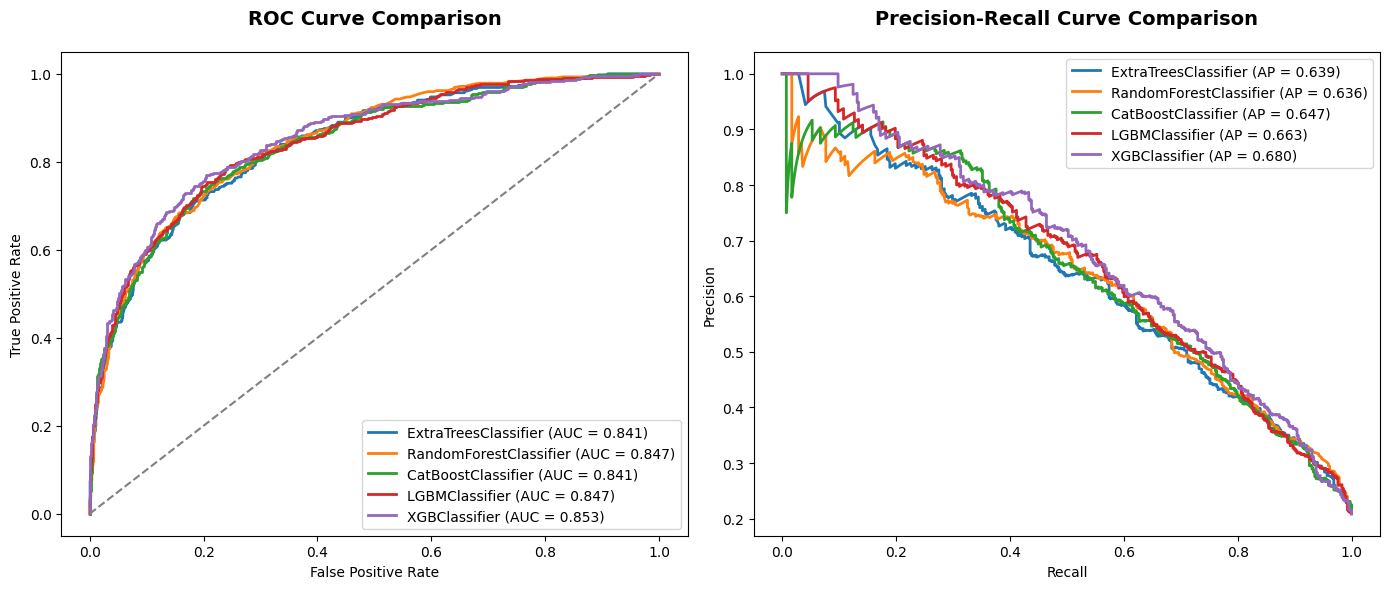

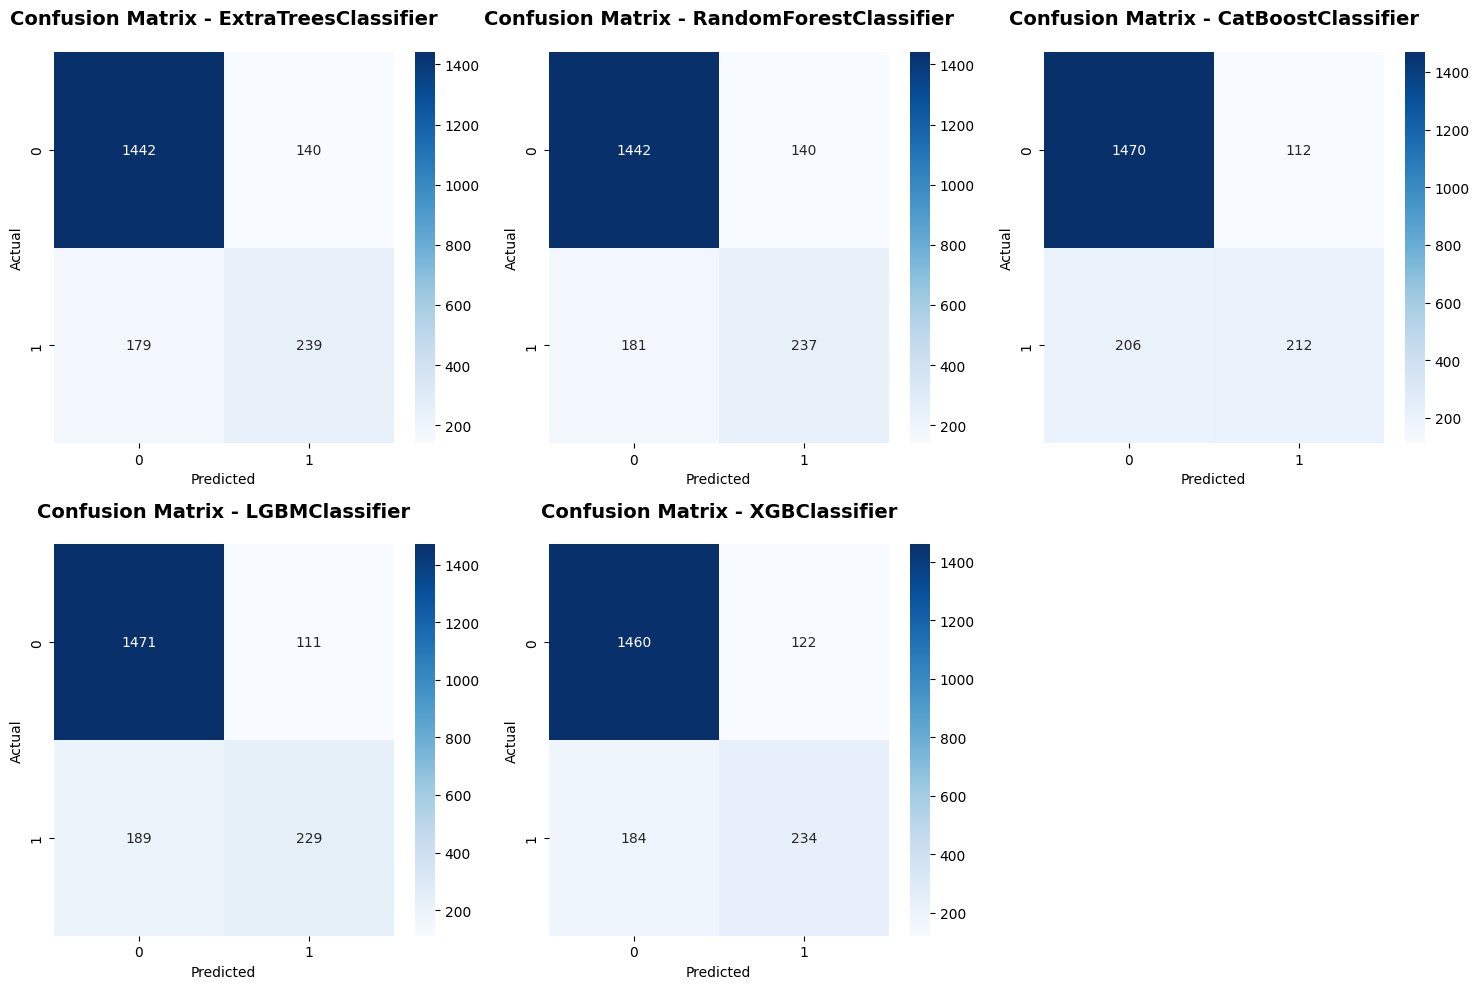

Classification Report - ExtraTreesClassifier
              precision    recall  f1-score   support

           0      0.890     0.912     0.900      1582
           1      0.631     0.572     0.600       418

    accuracy                          0.841      2000
   macro avg      0.760     0.742     0.750      2000
weighted avg      0.835     0.841     0.838      2000

Classification Report - RandomForestClassifier
              precision    recall  f1-score   support

           0      0.888     0.912     0.900      1582
           1      0.629     0.567     0.596       418

    accuracy                          0.840      2000
   macro avg      0.759     0.739     0.748      2000
weighted avg      0.834     0.840     0.836      2000

Classification Report - CatBoostClassifier
              precision    recall  f1-score   support

           0      0.877     0.929     0.902      1582
           1      0.654     0.507     0.571       418

    accuracy                          0.841    

In [328]:
models = {
    "ExtraTreesClassifier": model_etc,
    "RandomForestClassifier": model_rf,
    "CatBoostClassifier": model_cb,
    "LGBMClassifier": model_lgbm,
    "XGBClassifier": model_xgb
}

fpr_dict, tpr_dict, roc_auc_dict = {}, {}, {}
prec_dict, rec_dict, pr_auc_dict = {}, {}, {}
y_pred_dict = {}
y_pred_proba_dict = {}

for name, model in models.items():
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_val_prepared)
    y_pred_proba = model.predict_proba(X_val_prepared)[:, 1]
    
    y_pred_dict[name] = y_pred
    y_pred_proba_dict[name] = y_pred_proba

    # --- ROC ---
    fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    fpr_dict[name], tpr_dict[name], roc_auc_dict[name] = fpr, tpr, roc_auc

    # --- Precision-Recall Curve ---
    precision, recall, _ = precision_recall_curve(y_val, y_pred_proba)
    prec_dict[name], rec_dict[name] = precision, recall

# --- ROC & Precision-Recall Curve on the same figure ---
fig, ax = plt.subplots(1, 2, figsize=(14,6))

# ROC Curve
for name in models.keys():
    ax[0].plot(fpr_dict[name], tpr_dict[name], lw=2,
                 label=f"{name} (AUC = {roc_auc_dict[name]:.3f})")
ax[0].plot([0,1], [0,1], color="gray", linestyle="--")
ax[0].set_xlabel("False Positive Rate")
ax[0].set_ylabel("True Positive Rate")
ax[0].set_title("ROC Curve Comparison", fontsize=14, weight="bold", pad=20)
ax[0].legend(loc="lower right")

# Precision-Recall Curve
for name in models.keys():
    avg_prec = average_precision_score(y_val, y_pred_proba_dict[name])
    ax[1].plot(rec_dict[name], prec_dict[name], lw=2,
                 label=f"{name} (AP = {avg_prec:.3f})")
ax[1].set_xlabel("Recall")
ax[1].set_ylabel("Precision")
ax[1].set_title("Precision-Recall Curve Comparison", fontsize=14, weight="bold", pad=20)
ax[1].legend(loc="upper right")

plt.tight_layout()
plt.show()

# --- Confusion Matrices ---
fig, ax = plt.subplots(2, 3, figsize=(15,10))
ax = ax.ravel()
for i, (name, model) in enumerate(models.items()):
    cm = confusion_matrix(y_val, y_pred_dict[name])
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax[i])
    ax[i].set_title(f"Confusion Matrix - {name}", fontsize=14, weight="bold", pad=20)
    ax[i].set_xlabel("Predicted")
    ax[i].set_ylabel("Actual")
ax.flat[-1].set_visible(False)
plt.tight_layout()
plt.show()

# --- Classification Reports ---
for name in models.keys():
    print("="*50)
    print(f"Classification Report - {name}")
    print(classification_report(y_val, y_pred_dict[name], digits=3))

***XGBClassifier is the strongest candidate (AUC = 0.853, AP = 0.680, balanced confusion matrix).***

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Conclusion</span>

<div style="
    border-radius: 15px;
    border: 2px solid #2e7d32;
    padding: 20px;
    background: linear-gradient(125deg, #1b5e20 5%, #43a047 40%, #81c784 75%, #c8e6c9 100%);
    text-align: center;
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #fff;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);
        font-weight: bold;
        margin-bottom: 10px;
        font-size: 36px;
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Conclusion
    </h1>
</div>

In [331]:
# --- 1. Collect predictions (probabilities instead of labels) ---
ests = [
    ("cb", model_cb),
    ("xgb", model_xgb),
    ("lgbm", model_lgbm),
    ("rf", model_rf),
    ("etc", model_etc)
]

# Lấy xác suất class 1 (churn)
preds = {name: m.predict_proba(X_val_prepared)[:, 1] for name, m in ests}

# --- 2. AUC của từng model ---
auc_each = {name: roc_auc_score(y_val, preds[name]) for name,_ in ests}
display(auc_each)

# --- 3. Chuẩn bị matrix cho ensemble ---
A = np.column_stack([preds[name] for name,_ in ests])  # shape (n_val, n_models)

# --- 4. Optuna objective function: maximize AUC ---
def obj_w(trial):
    w = np.array([trial.suggest_float(f"w_{i}", 0.0, 5.0) for i in range(A.shape[1])])
    if w.sum() == 0: 
        return 1e6  # tránh chia 0
    y_hat = A.dot(w / w.sum())  # weighted average probs
    return roc_auc_score(y_val, y_hat)

# --- 5. Run optimization ---
study_w = optuna.create_study(direction="maximize")  
study_w.optimize(obj_w, n_trials=1000, show_progress_bar=True)

# --- 6. Extract best weights ---
w = np.array([study_w.best_params[f"w_{i}"] for i in range(A.shape[1])])
weights = (w / w.sum()).tolist()
print("Best weights (normalized):", weights)
print("Best AUC:", study_w.best_value)

{'cb': 0.8413143679794822,
 'xgb': 0.8533138961643852,
 'lgbm': 0.8468536586841198,
 'rf': 0.8467893889994496,
 'etc': 0.8407019156902715}

  0%|          | 0/1000 [00:00<?, ?it/s]

Best weights (normalized): [0.018840549516303946, 0.5700554617911531, 0.08670202047472023, 0.1675632175853499, 0.1568387506324727]
Best AUC: 0.8570490990146323


In [333]:
from sklearn.ensemble import VotingClassifier
voting_clf_soft = VotingClassifier(
    estimators=[
        ("etc", model_etc),
        ("rf", model_rf),
        ("cb", model_cb),
        ("lgbm", model_lgbm),
        ("xgb", model_xgb),
    ], weights=weights,
    voting="soft",
    n_jobs=-1
)

cv_scores = cross_val_score(
    voting_clf_soft,
    X=X_resampled,
    y=y_resampled,
    cv=kfold,
    scoring="roc_auc",
    n_jobs=-1
)
print(f"Cross-validated ROC-AUC (mean ± std): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

Cross-validated ROC-AUC (mean ± std): 0.9733 ± 0.0020


Evaluating VotingClassifier...


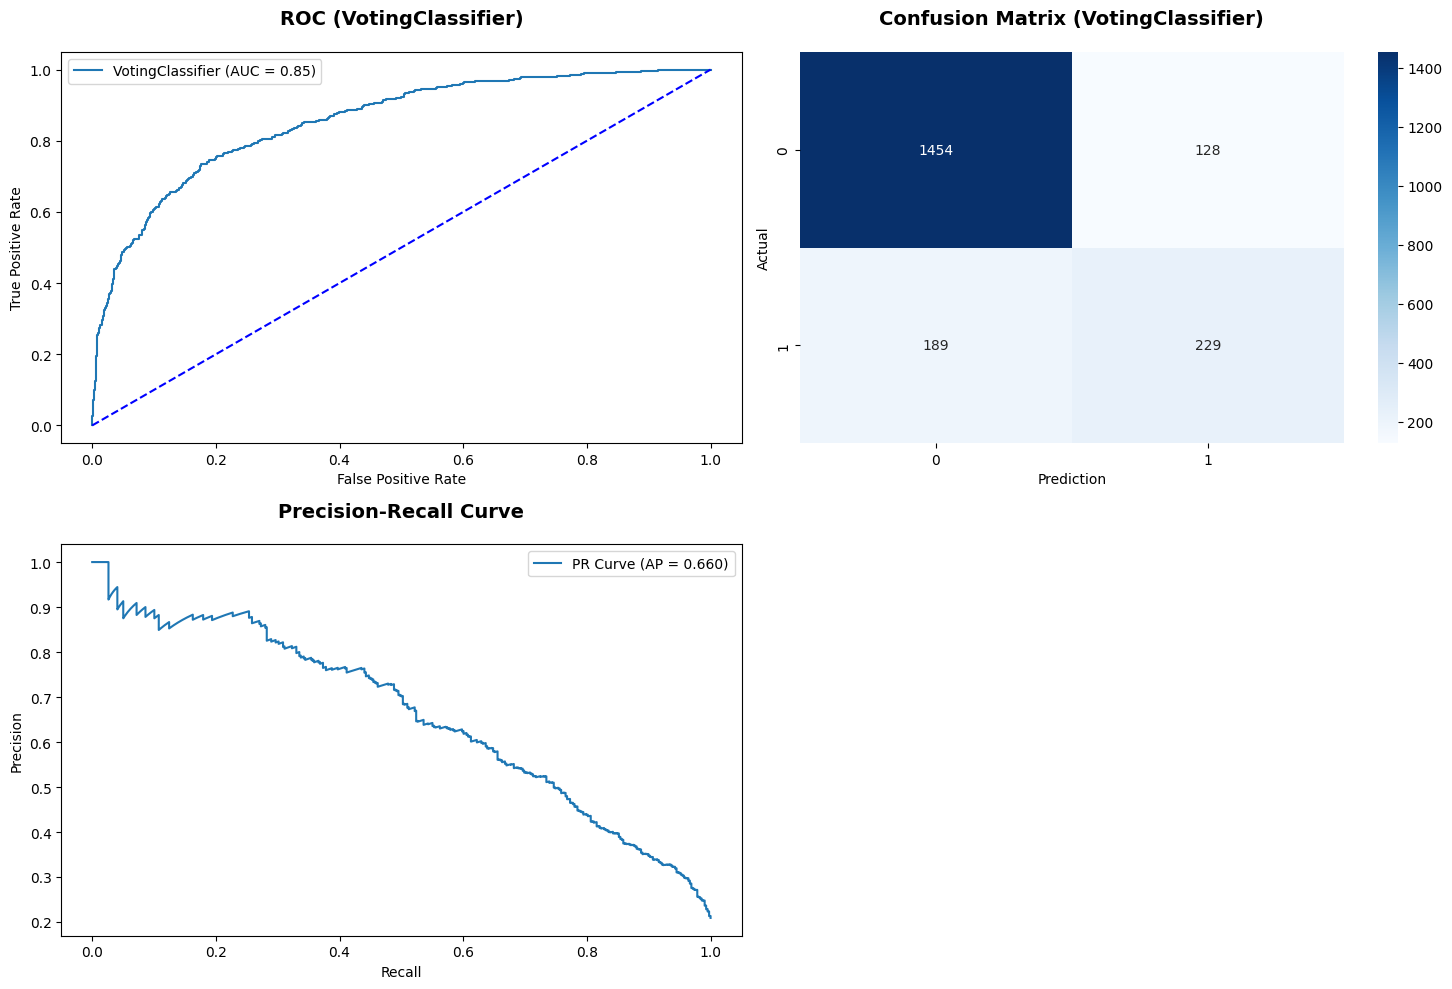

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      1582
           1       0.64      0.55      0.59       418

    accuracy                           0.84      2000
   macro avg       0.76      0.73      0.75      2000
weighted avg       0.83      0.84      0.84      2000



In [339]:
evaluate_model(model = voting_clf_soft, X_train=X_resampled, X_val=X_val_prepared,
               y_train=y_resampled, y_val=y_val, figsize=(15, 10))

PermutationExplainer explainer: 101it [00:36,  1.97it/s]                         


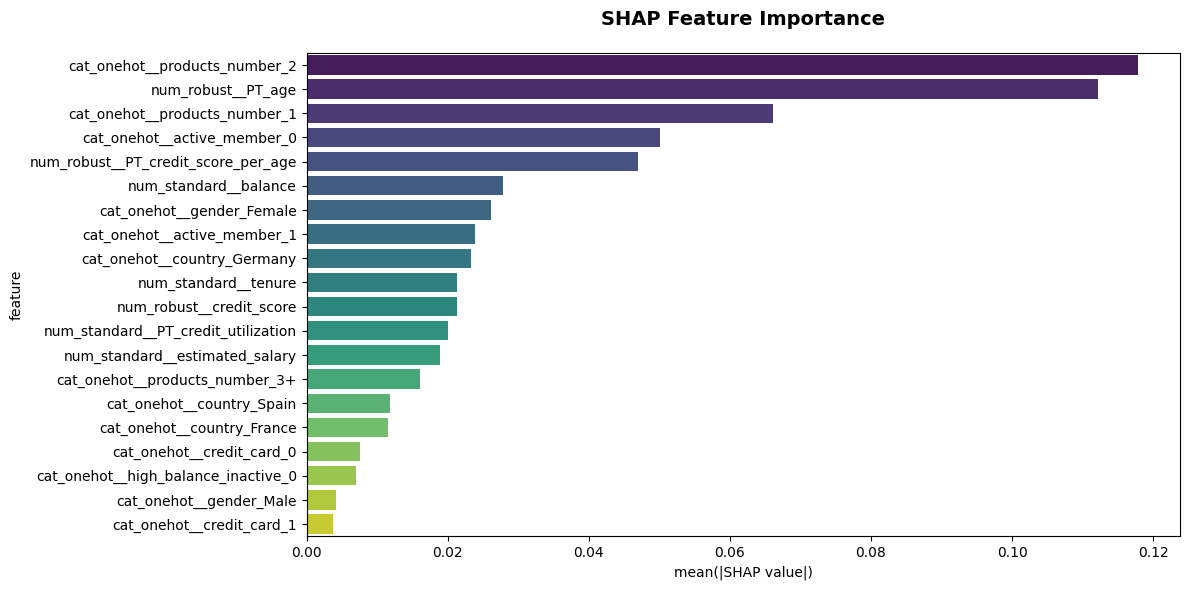

In [343]:
shap_sample = X_val_prepared.iloc[:100] if isinstance(X_val_prepared, pd.DataFrame) else X_val_prepared[:100]
shap_plot(model=voting_clf_soft.named_estimators_["xgb"], X_test=shap_sample, list_feature=list_feature_prepared, type="bar")

PermutationExplainer explainer: 101it [00:34,  2.02it/s]                         


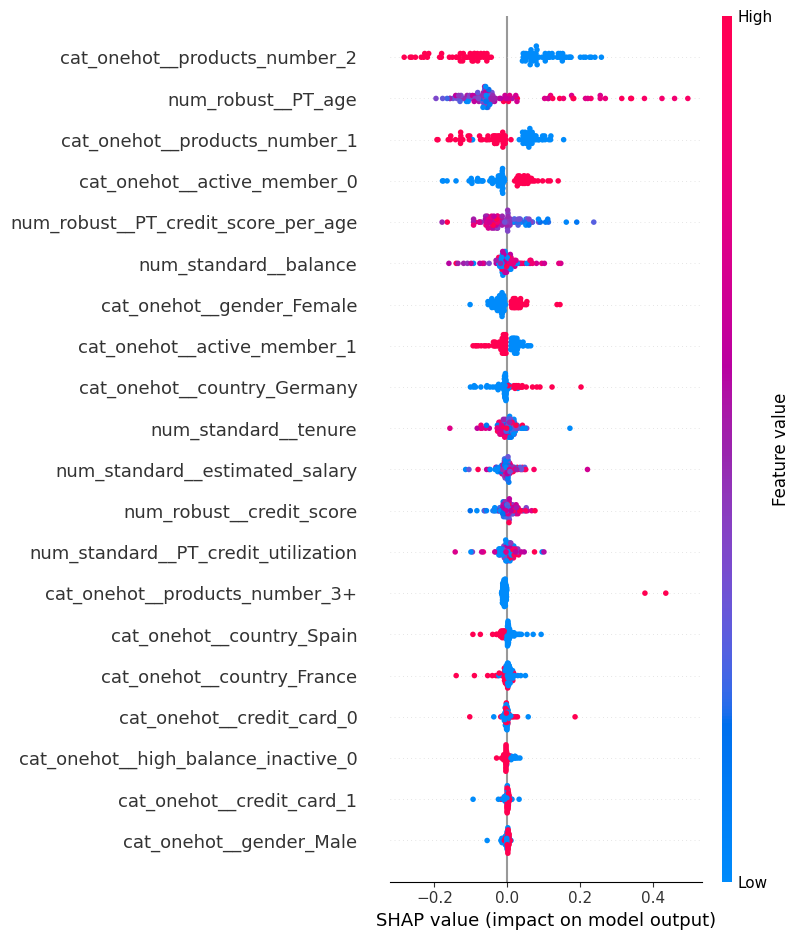

In [344]:
shap_plot(model=voting_clf_soft.named_estimators_["xgb"], X_test=shap_sample, list_feature=list_feature_prepared)

**Overall Insights**

* **Older customers, with exactly 2 products, and inactive status → most likely to churn.**
* **Younger customers, with 1 product, active, and higher credit scores → least likely to churn.**
* Retention strategies should focus on:

  * **Customers with 2 products** (cross-sell more products to boost engagement).
  * **Inactive members** (re-activation campaigns).
  * **Older customer segment** (design tailored offerings to maintain loyalty).
  * **Female customers** (further analysis may be needed since gender stands out in feature importance).

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Recommendation</span>

<div style="
    border-radius: 15px;
    border: 2px solid #2e7d32;
    padding: 20px;
    background: linear-gradient(125deg, #1b5e20 5%, #43a047 40%, #81c784 75%, #c8e6c9 100%);
    text-align: center;
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #fff;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);
        font-weight: bold;
        margin-bottom: 10px;
        font-size: 36px;
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Recommendation
    </h1>
</div>

* **Re-activate Inactive Members**

  * Launch targeted campaigns (cashback, reward points).
  * Early-warning system for “High Balance but Inactive” customers.

* **Product Strategy**

  * Customers with **2 products = high churn risk** → promote cross-sell (credit card, loan, insurance).
  * Customers with **1 product = low churn** → monitor to prevent migration to risk group.

* **Customer Segments**

  * **Older customers (55+)**: offer retirement-friendly financial products and personalized services.
  * **Female customers**: design gender-focused campaigns (shopping, lifestyle perks).

* **Credit & Financial Health**

  * Reward customers with **high Credit Score per Age** (e.g., lower loan rates).
  * Provide **financial coaching** for low-score customers.

* **Country-Specific Strategy**

  * **Germany = higher churn** → localized customer care and retention policies.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

<div style="
    border-radius: 15px;
    border: 2px solid #2e7d32;
    padding: 20px;
    background: linear-gradient(125deg, #1b5e20 5%, #43a047 40%, #81c784 75%, #c8e6c9 100%);
    text-align: center;
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        🙏 Thanks for Reading! 🚀
    </h1>
    <p style="color: #ffffff; font-size: 18px; text-align: center;">
        Happy Coding! 🙌😊
    </p>
</div>
